<a href="https://colab.research.google.com/github/Nastiiasaenko/Week-3XAI/blob/main/Week_3_XAI_Anastasiia_Saenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>[Anastasiia Saenko](#scrollTo=zvUH2mMP87qF)

>>[Here is the outline of analysis.](#scrollTo=zvUH2mMP87qF)

>[Part 1. Data and EDA](#scrollTo=KqOg-_AL-6sA)

>>[Imports for the notebook](#scrollTo=sBl_C-zgAPWL)

>>[Exploratory Data Analysis](#scrollTo=zBGxvcI2GzL3)

>>>[What can we say about how monthly charges or price for services impacts the churn?](#scrollTo=5k0VBbd_J4HX)

>>[Now we will look at distributions for categorical variables and see if there is anything highly related to churn.](#scrollTo=BRIHKXVsLEMU)

>>[Let's run a statistical test to see if there are any significant differences in distributions across categories.](#scrollTo=3UpamM_xNaWL)

>[Exploratory Data Analysis (EDA) Findings:](#scrollTo=zkQmObydODFs)

>[Checking for assumption for each model.](#scrollTo=eRGFzHzrQYvO)

>>[Linear Regression Assumption.](#scrollTo=eRGFzHzrQYvO)

>>>[Check Homoscedasticity and Normality of Residuals](#scrollTo=5Dp52ty1VdJT)

>>>[The model defined just with continious variables isn't correctly specified and violates multiple assumptions so let's move on to a better specified model.](#scrollTo=ps4pSPsmVvYz)

>>[Specified linear model](#scrollTo=UPa14HZtYauB)

>>[Reassesing multi-collinearity](#scrollTo=l97cGlTAdIS8)

>[LINEAR REGRESSION ASSUMPTIONS CHECK - pre-model fitting](#scrollTo=mwGJr5DilCyj)

>>[Linearity - let's assess each features relationship.](#scrollTo=FmQlXA3DlNbL)

>>[We can asses that only for numeric features - tenure, monthly charges, total charges.](#scrollTo=FmQlXA3DlNbL)

>>[Since the target variable is binary the assumption doesn't make much sense.](#scrollTo=V4OcodcKm6HQ)

>>>[Since we have a binary outcome and now binary dummy-variables we can assess linear relationaships through the](#scrollTo=jK7B64SxTWrE)

>>[Linearity assumption for LR conclusion:](#scrollTo=fhQGDuPIWCr6)

>>[Multi-collinearity assumption](#scrollTo=KtmZoK7aXfu2)

>[No endogeneity assumption](#scrollTo=3LKbCutuaz2g)

>[Fitting the first model and assesing other assumptions](#scrollTo=Keoqr45nbdVS)

>>>[Linear Regression Model Specification](#scrollTo=MtuUj4Xpjp5P)

>[Assumption check](#scrollTo=QRt7jP49boXh)

>>[Independence](#scrollTo=QRt7jP49boXh)

>>[Homoscedasticity](#scrollTo=ug2aHlGZdKQR)

>[Assessing the linear model performance](#scrollTo=N4nCAxieecjY)

>>>[Linear Model interpretation](#scrollTo=UWDvr9VFinJk)

>>>[Summary of Predictor Impact on Churn:](#scrollTo=UWDvr9VFinJk)

>>[Additional - improving the linear regression](#scrollTo=FHpBG9PyjSXv)

>>>>[Lasso and Ridge](#scrollTo=FHpBG9PyjSXv)

>>[Summary of Lasso Coefficients Analysis:](#scrollTo=AbusItJpk_7b)

>[Logistic Regression](#scrollTo=GRRiNvC_h_pH)

>>[Fitting Logistic Regression](#scrollTo=ltH92bPfmmCJ)

>[Assumptions Check](#scrollTo=BBaVt8HZnqHQ)

>>[Linearity](#scrollTo=BBaVt8HZnqHQ)

>>[No Influential Outliers](#scrollTo=SOcYByGtpzFE)

>[Logistic Regression Model Interpretation](#scrollTo=dYXMbjqxq7ig)

>>>[Lasso Logistic Regression](#scrollTo=WX3lFfRCsNwj)

>>[Models Interpretation](#scrollTo=maL7VNEnt2HI)

>>>[Logistic Regression](#scrollTo=mDwjFhIQ2Im6)

>>>[Lasso Logistic Regression](#scrollTo=mDwjFhIQ2Im6)

>>>[Interpretation of Lasso Logistic Regression Coefficients](#scrollTo=mDwjFhIQ2Im6)

>>>[Key Findings:](#scrollTo=mDwjFhIQ2Im6)

>[GAM](#scrollTo=KNXS9at-3ehI)

>[GAM interpretation](#scrollTo=M3DptfUS_7JP)

>>[Continious variables visualization](#scrollTo=EZ3J3_KG7uEm)

>>[GAM Interpretation](#scrollTo=X8I84BRnBrO_)

>>>[Partial difference for binary predictors](#scrollTo=DjlR5I6OD_8S)

>[Final Model Comparison](#scrollTo=9KHu3y3VOz3p)

>[Recommendation for the company](#scrollTo=9KHu3y3VOz3p)



### Anastasiia Saenko
In this notebook we are working with a dataset from a telecom company trying to understand what factors contribute to customers churning. Churn refers to a commonly used metric in business and product analytics - percent of customers who stop using a product after a certain period of time.

## Here is the outline of analysis.

1. **Part 1 - understanding the dataset and exploratory data analysis (EDA)**

In this part we will explore how different customer characteristics impact churning rate and explore different aspects of the dataset. In this part we will also check the dataset for common assumptions to determine whether or not we can use certain type of models for the analysis.

2. **Part 2 - modeling with explainable models**
In this part we will use the models we evaluated assumptions for in the first part:

* Linear Regression

* Logistic Regression

* GAM (Generalized Additive Model) -

3. **Part 3 - model comparison**

4. **Part 4 - Recommendation**

In this part we will compare the model performance and recommend which ones are more suitable for this task.

# Part 1. Data and EDA

We are using a dataset containing customer information of a certain telecom company.

The dataset and its description can be found [here on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data).

Following the description from the original customer competition:

**Content**
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents



## Imports for the notebook

In [3]:
!pip install pygam
!pip install shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 22.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 15.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from pygam import LogisticGAM, s, f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Downloading the dataset

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/Nastiiasaenko/Week-3XAI/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
df.shape

(7043, 21)

We have data on 7043 customers with 21 features.

Step 2 - recode and clean the data.

In [14]:
# Check for null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Data cleaning**

In [48]:
## Convert categorical variables to machine readable and dummies
df['gender'] = df['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
df.Partner = df.Partner.map({'Yes':1, "No":0})
df.Dependents = df.Dependents.map({'Yes':1, "No":0})
df['PhoneService'] = df['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df['MultipleLines'] = df['MultipleLines'].map(lambda x: {'Yes': 1, 'No': 0, 'No phone service':2}[x.strip()])
df['InternetService'] = df['InternetService'].map(lambda x: {'DSL': 1, 'No': 0, 'Fiber optic':2}[x.strip()])
df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['OnlineBackup'] = df['OnlineBackup'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['DeviceProtection'] = df['DeviceProtection'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['TechSupport'] = df['TechSupport'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['StreamingTV'] = df['StreamingTV'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['StreamingMovies'] = df['StreamingMovies'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
df['Contract'] = df['Contract'].map(lambda x: {'Month-to-month': 1, 'One year': 0, 'Two year':2}[x.strip()])
df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df['PaymentMethod'] = df.PaymentMethod

df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)


df['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])


In [50]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaN values in TotalCharges after conversion
missing_total_charges = df['TotalCharges'].isnull().sum()

# Filling missing values in TotalCharges with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify the conversion
df['TotalCharges'].dtype, missing_total_charges


(dtype('float64'), 11)

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,2,1,0,...,0,0,1,1,29.85,29.85,0,False,True,False
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,...,0,0,0,0,56.95,1889.50,0,False,False,True
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,0,0,1,1,53.85,108.15,1,False,False,True
3,7795-CFOCW,0,0,0,0,45,0,2,1,1,...,0,0,0,0,42.30,1840.75,0,False,False,False
4,9237-HQITU,1,0,0,0,2,1,0,2,0,...,0,0,1,1,70.70,151.65,1,False,True,False


## Exploratory Data Analysis

Before jumping to check assumptions for each model let's explore relationships betweeen variables (customer characteristics) and our target variable (churn). Since most of the variables are categorical we can't access all features and target variable in terms of their correlation but rather we will look at the distributions of variables.

But we will start with analysing the numeric variables - for example, the price of services can be a crucial factor in churn.

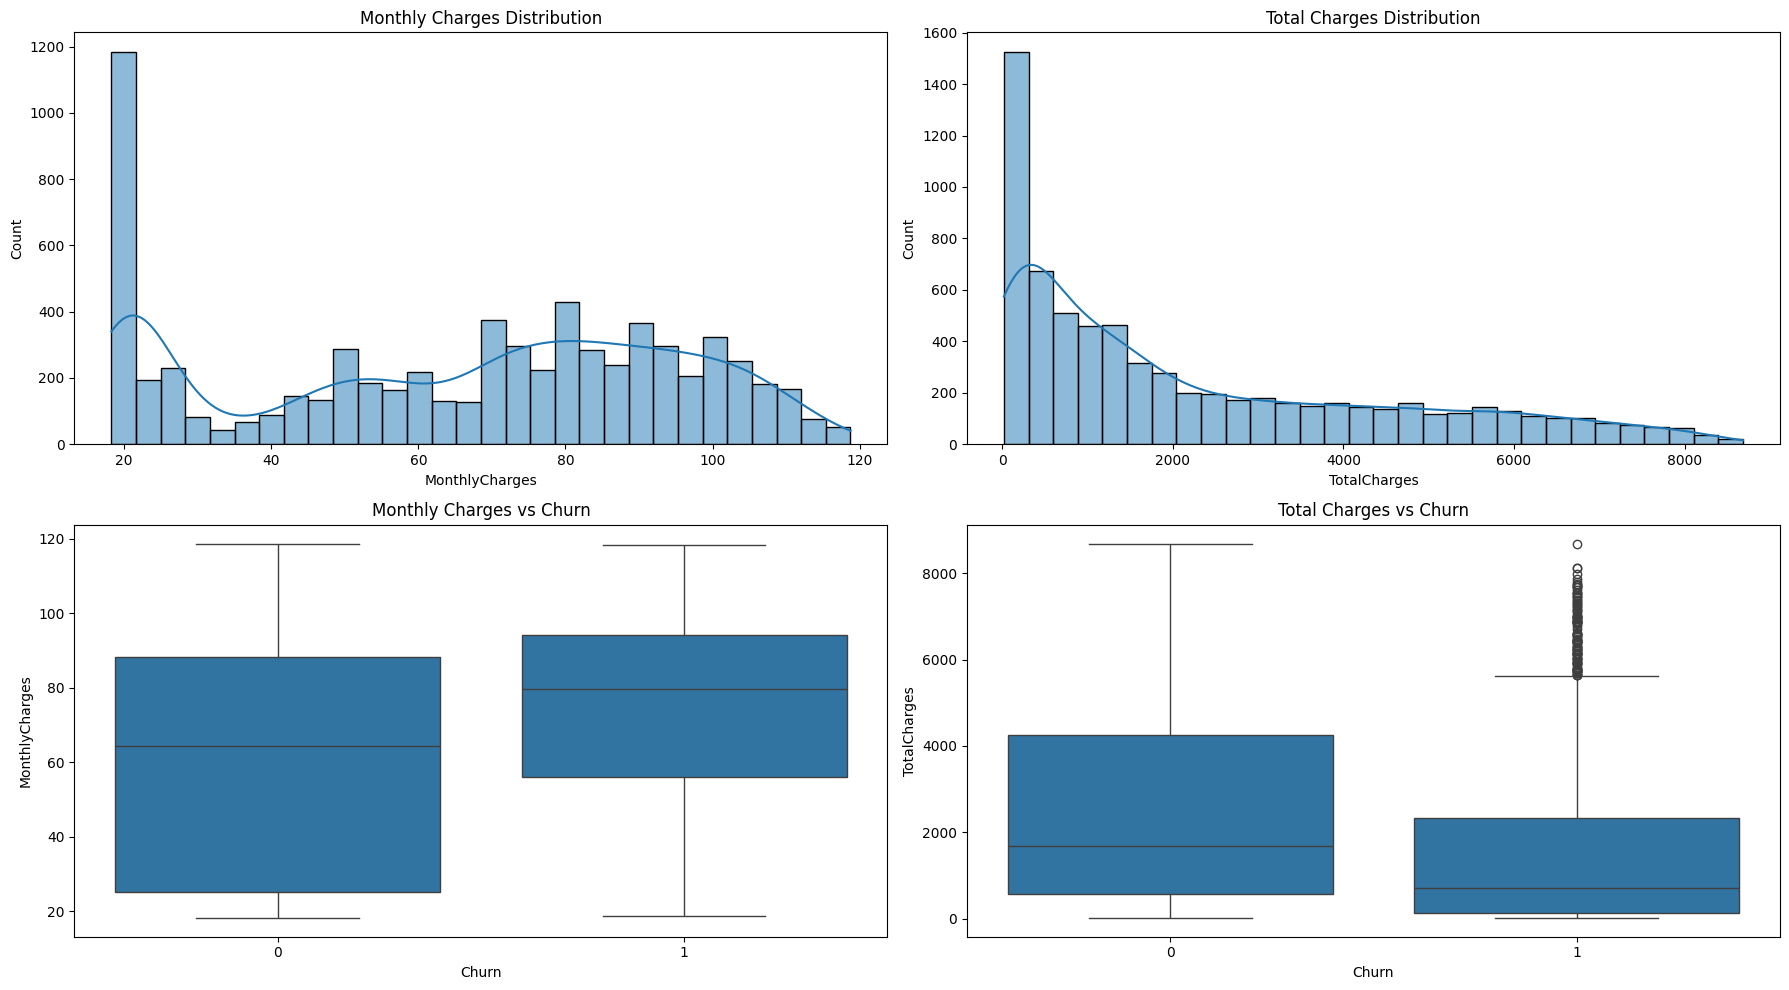

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the canvas for multiple plots
plt.figure(figsize=(18, 10))

# Visualizing the distribution of numerical variables
plt.subplot(2, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Monthly Charges Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['TotalCharges'], kde=True, bins=30)
plt.title('Total Charges Distribution')

plt.subplot(2, 2, 3)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')

plt.subplot(2, 2, 4)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges vs Churn')

plt.tight_layout()
plt.show()



### What can we say about how monthly charges or price for services impacts the churn?

Customers who churn tend to have higher MonthlyCharges compared to those who stay, as shown in the box plot.

<ipython-input-20-78b01989550b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['Churn'] = numerical_df['Churn'].astype(int)


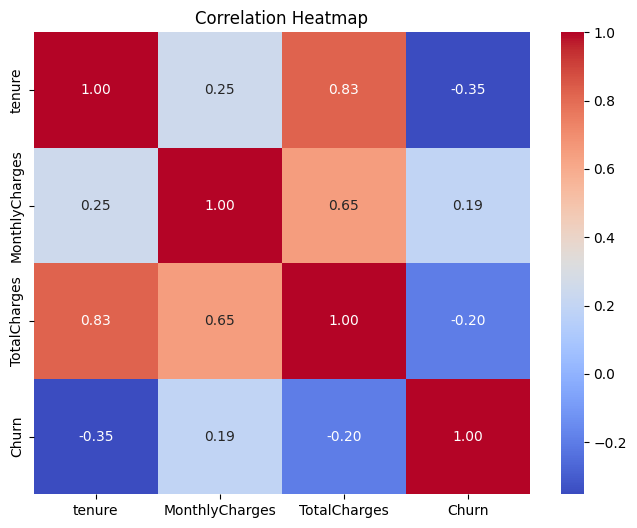

In [20]:
# Correlation heatmap for numerical variables
numerical_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
numerical_df['Churn'] = numerical_df['Churn'].astype(int)

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**Initial thoughts on numeric features and churn**

* We can see that most features are negatively correlated with the Churn probability but the multitude of the correlation isn't very high. (For tenure and Total Churn)

* Monthly churn is positively correlated but correlation isn't too high.

Since none correlations appear to be significant we can't really say anything if anything in particular has impact on churn.

## Now we will look at distributions for categorical variables and see if there is anything highly related to churn.

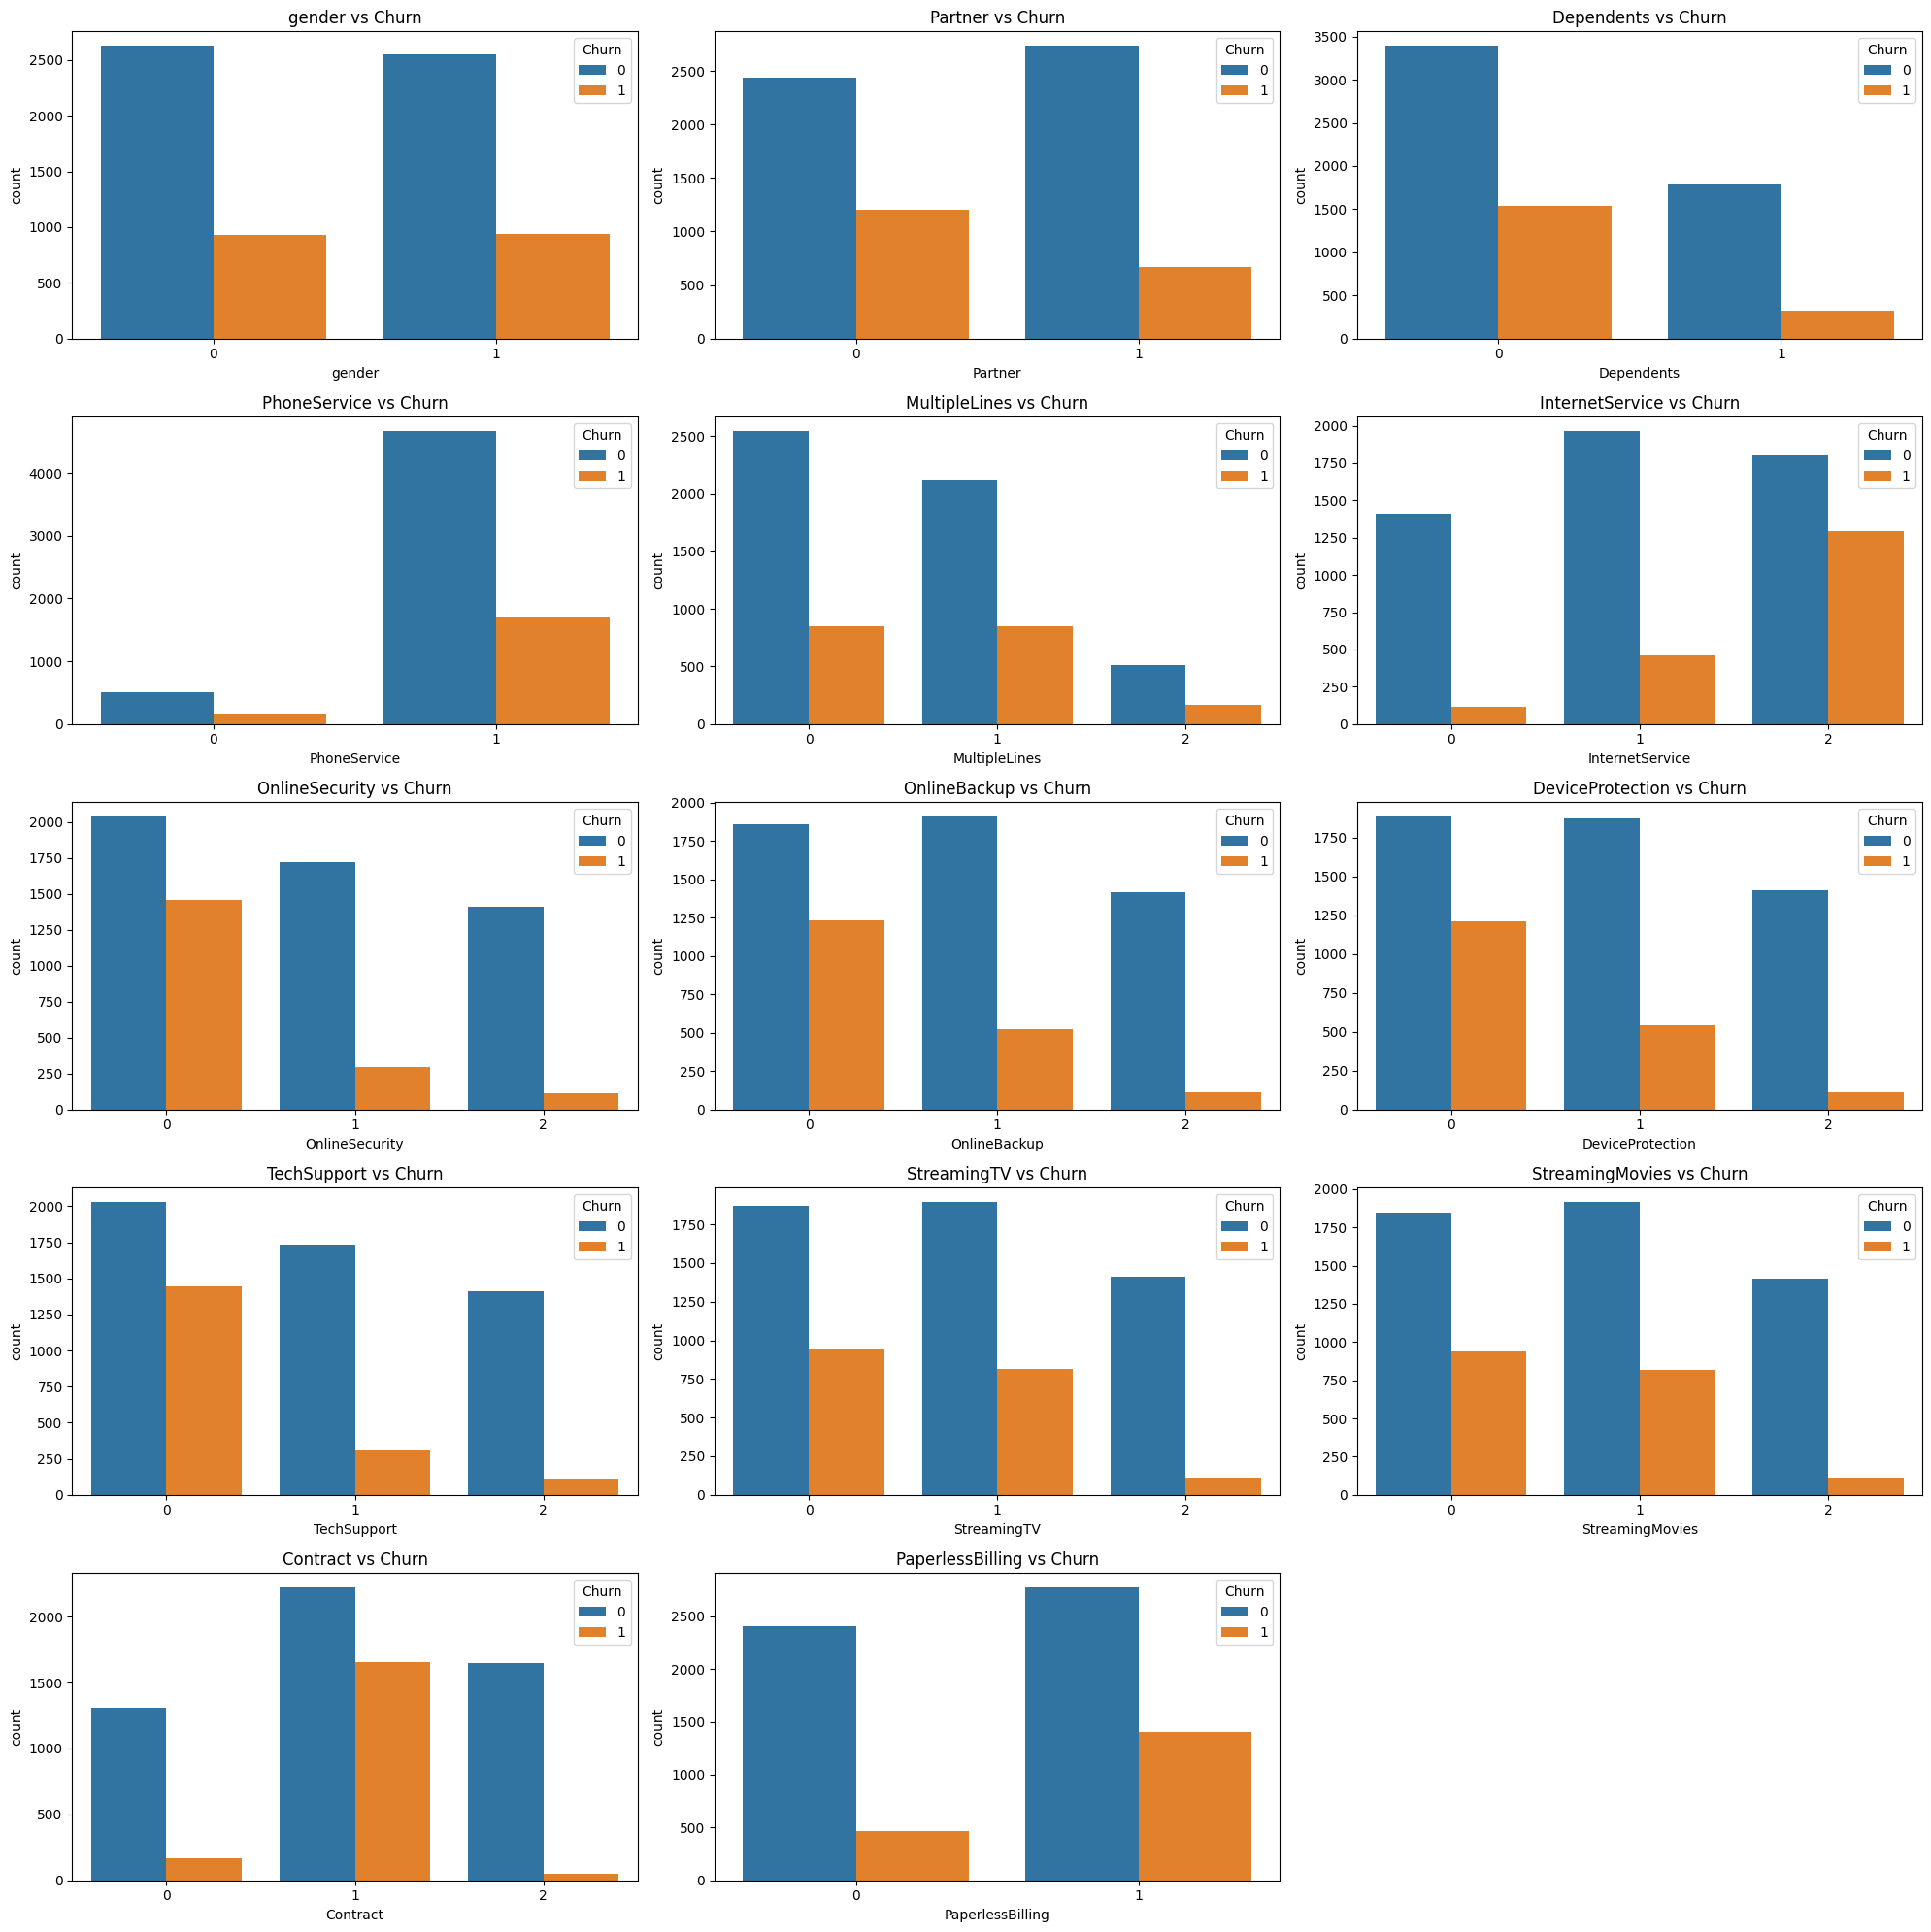

In [21]:
# Checking the relationships between the categorical variables and the target (Churn)
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns that were mapped
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling']

# Set up the canvas for multiple bar plots
plt.figure(figsize=(20, 20))

# Plotting each categorical variable against Churn
for i, col in enumerate(categorical_columns):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')

plt.tight_layout()
plt.show()


## Let's run a statistical test to see if there are any significant differences in distributions across categories.



In [43]:
from scipy.stats import chi2_contingency
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling']

# Function to perform Chi-Square test on categorical features
def chi_square_test(df, col):
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test on all categorical columns
chi_square_results = {col: chi_square_test(df, col) for col in categorical_columns}

# Filter significant results (p < 0.05)
significant_results = {col: p for col, p in chi_square_results.items() if p < 0.05}

significant_results


{'Partner': 2.1399113440759935e-36,
 'Dependents': 4.9249216612154196e-43,
 'MultipleLines': 0.0034643829548773,
 'InternetService': 9.571788222840544e-160,
 'OnlineSecurity': 2.661149635176552e-185,
 'OnlineBackup': 2.0797592160864276e-131,
 'DeviceProtection': 5.505219496457244e-122,
 'TechSupport': 1.4430840279998987e-180,
 'StreamingTV': 5.528994485739183e-82,
 'StreamingMovies': 2.667756755723681e-82,
 'Contract': 5.863038300673391e-258,
 'PaperlessBilling': 4.073354668665985e-58}

We can see quite a few variables have some significant differences in distributions for customers who churned and who didn't.

Let's summarize what we have found so far.

# Exploratory Data Analysis (EDA) Findings:

- **Contract Type and Tenure**:
  - **Month-to-month** contracts have the highest churn rates, while longer-term contracts (one or two years) reduce churn significantly.
  - Customers with longer tenure are more loyal and less likely to leave, reinforcing the importance of securing long-term commitments.

- **Cost Factors**:
  - Higher **Monthly Charges** are a strong driver of churn, whereas total accumulated costs (**Total Charges**) don't show a strong correlation. Customers seem sensitive to ongoing costs rather than long-term spending.

- **Services and Add-ons**:
  - Lack of services like **OnlineSecurity**, **TechSupport**, and **DeviceProtection** correlates with higher churn.  People who are buying services beyond standard neccessary ones are likely to stay with the product more.
  - Streaming services like **StreamingTV** and **StreamingMovies** are not as significant, but those who do not use these services are somewhat more likely to churn.

- **Demographics and Relationships**:
  - Customers without a **partner** or **dependents** are more likely to churn. Household dynamics could play a role in service stability, with those in more stable environments (e.g., with a partner or dependents) less likely to switch providers.

- **Billing and Payment Methods**:
  - **Electronic check** users churn far more often than those using **automatic bank transfers** or **credit cards**. Simplifying payment methods or promoting auto-pay options could help retention.
  - Interestingly, customers using **paperless billing** churn more frequently.




# Checking for assumption for each model.

## Linear Regression Assumption.

* Linearity: The relationship between the independent and dependent variables must be linear.
* Independence: Observations must be independent of each other.
* Homoscedasticity: The variance of residuals should remain constant across all levels of the independent variables.
* Normality: The residuals must be normally distributed.
* No Multicollinearity: Predictor variables should not be highly correlated.
* No Autocorrelation: There should be no correlation between residuals.
* No Endogeneity: The independent variables should not be correlated with the error term.
* Correct Specification: The model should include all relevant variables and be correctly formulated.

**For the simplicity we will start with the model with just continious variables**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]  # Numeric features
y = df['Churn']  # Churn as continuous variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = linear_model.coef_
intercept = linear_model.intercept_

mse, r2, coefficients, intercept


(0.14403070447518657,
 0.2600395907874097,
 array([-2.78644804e-03,  6.94630655e-03, -7.34066157e-05]),
 0.07323912710430511)

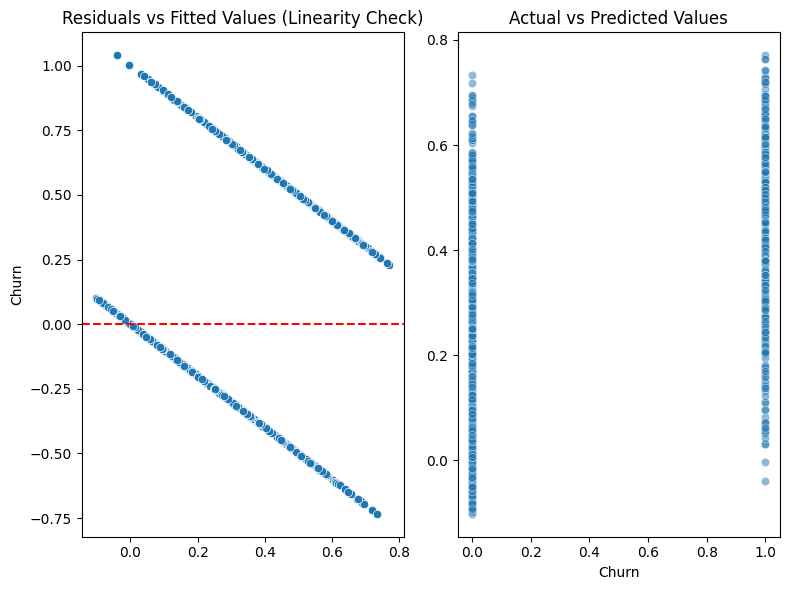

In [52]:
# Checking linearity and multicollinearity

# Linearity check using residual plots and actual vs predicted values plot
plt.figure(figsize=(8, 6))

# Residuals plot to check for linearity (fitted values vs residuals)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=(y_test - y_pred))
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Linearity Check)')

# Actual vs Predicted values
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')

plt.tight_layout()
plt.show()


In [53]:
# Multicollinearity check using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif_data


,feature,VIF
0,tenure,6.411602
1,MonthlyCharges,3.395187
2,TotalCharges,8.172729


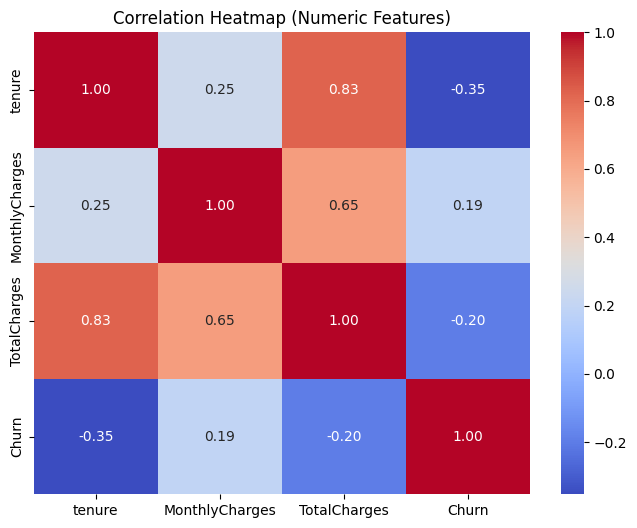

In [54]:
# Multicollinearity via corr-map

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Linearity check using correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**As expected total charges and montly charges and tenure are hugely correlated since they all provide same information - how much the customer is paying over time**

Assumption Check Results for Linear Regression:

**Linearity:**

The Residuals vs Fitted Values plot shows a clear pattern, suggesting that the linearity assumption might be violated. The relationship between the predictors and churn does not seem perfectly linear.

**Multicollinearity:**
The VIF values show multicollinearity, particularly for tenure (VIF = 6.41) and TotalCharges (VIF = 8.17), which exceed the acceptable threshold of 5.

### Check Homoscedasticity and Normality of Residuals

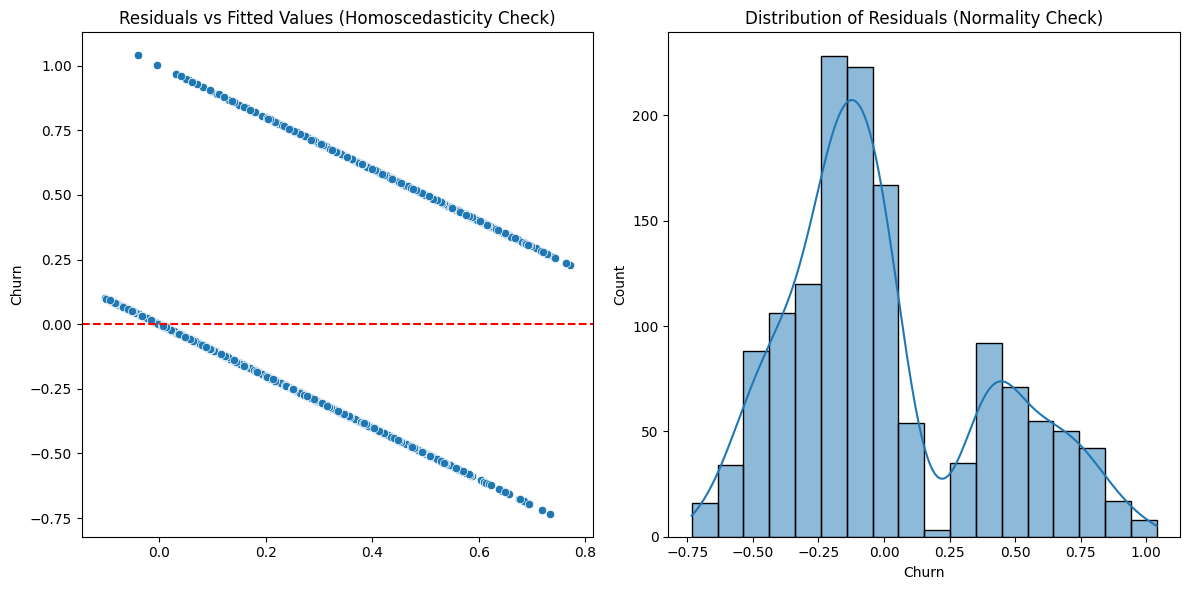

ShapiroResult(statistic=0.9338971943178517, pvalue=1.672611335237559e-24)

In [55]:
# Check homoscedasticity and normality of residuals
import scipy.stats as stats

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))

# Homoscedasticity: Residuals vs Fitted Values plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Homoscedasticity Check)')

# Normality: Residuals histogram with KDE plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Normality Check)')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
shapiro_test


Homoscedasticity and Normality Check Results:

**Homoscedasticity:**

The Residuals vs Fitted Values plot shows a clear pattern, indicating potential heteroscedasticity (i.e., the variance of residuals is not constant across all fitted values).
Normality:

The Residuals Distribution plot shows some deviations from normality, particularly at the extremes.


### The model defined just with continious variables isn't correctly specified and violates multiple assumptions so let's move on to a better specified model.

In [ ]:
# ## Convert categorical variables to machine readable and dummies
# df['gender'] = df['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
# df.Partner = df.Partner.map({'Yes':1, "No":0})
# df.Dependents = df.Dependents.map({'Yes':1, "No":0})
# df['PhoneService'] = df['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
# df['MultipleLines'] = df['MultipleLines'].map(lambda x: {'Yes': 1, 'No': 0, 'No phone service':2}[x.strip()])
# df['InternetService'] = df['InternetService'].map(lambda x: {'DSL': 1, 'No': 0, 'Fiber optic':2}[x.strip()])
# df['OnlineSecurity'] = df['OnlineSecurity'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['OnlineBackup'] = df['OnlineBackup'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['DeviceProtection'] = df['DeviceProtection'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['TechSupport'] = df['TechSupport'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['StreamingTV'] = df['StreamingTV'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['StreamingMovies'] = df['StreamingMovies'].map(lambda x: {'Yes': 1, 'No': 0, 'No internet service':2}[x.strip()])
# df['Contract'] = df['Contract'].map(lambda x: {'Month-to-month': 1, 'One year': 0, 'Two year':2}[x.strip()])
# df['PaperlessBilling'] = df['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
# df['PaymentMethod'] = df.PaymentMethod

# df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)


# df['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])


In [ ]:
df.columns

In [ ]:
df.shape

## Specified linear model

For multiple categories let's make more dummies.


In [6]:
### At this point, easier to re-read the data since we didn't exclude anything yet.
df = pd.read_csv('https://raw.githubusercontent.com/Nastiiasaenko/Week-3XAI/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')


Let's create a more specified dataset for linear model.

In [7]:
df_linmodel = df.copy()

In [8]:
# Convert categorical variables to machine-readable and dummies
df_linmodel['gender'] = df_linmodel['gender'].map(lambda x: {'Female': 1, 'Male': 0}[x.strip()])
df_linmodel.Partner = df_linmodel.Partner.map({'Yes': 1, "No": 0})
df_linmodel.Dependents = df_linmodel.Dependents.map({'Yes': 1, "No": 0})
df_linmodel['PhoneService'] = df_linmodel['PhoneService'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])
df_linmodel['InternetService'] = df_linmodel['InternetService'].map(lambda x: {'DSL': 1, 'Fiber optic': 1,'No':0}[x.strip()])


# Simplifying add-ons: Keep only "Yes" as 1, treat all else (No, No internet service) as 0
df_linmodel['OnlineSecurity'] = df_linmodel['OnlineSecurity'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['OnlineBackup'] = df_linmodel['OnlineBackup'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['DeviceProtection'] = df_linmodel['DeviceProtection'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['TechSupport'] = df_linmodel['TechSupport'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['StreamingTV'] = df_linmodel['StreamingTV'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['StreamingMovies'] = df_linmodel['StreamingMovies'].map(lambda x: 1 if x.strip() == 'Yes' else 0)
df_linmodel['MultipleLines'] = df_linmodel['MultipleLines'].map(lambda x: 1 if x.strip() == 'Yes' else 0)

# Keep Contract, InternetService, and PaymentMethod in their multi-category format for one-hot encoding

df_linmodel['PaperlessBilling'] = df_linmodel['PaperlessBilling'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])

# One-hot encode for PaymentMethod, InternetService, and Contract
df_linmodel = pd.get_dummies(df_linmodel, columns=['PaymentMethod', 'Contract'])
# df_linmodel = pd.get_dummies(df_linmodel, columns=[ 'InternetService'], drop_first=True)

# Convert Churn to binary
df_linmodel['Churn'] = df['Churn'].map(lambda x: {'Yes': 1, 'No': 0}[x.strip()])


In [9]:
df_linmodel['TotalCharges'] = pd.to_numeric(df_linmodel['TotalCharges'], errors='coerce').fillna(0)

df_linmodel = df_linmodel.drop(columns=[ 'customerID'])

## Reassesing multi-collinearity

In [10]:
df_linmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

# LINEAR REGRESSION ASSUMPTIONS CHECK - pre-model fitting
We will asses the assumptions of a linear model pre-fitting the actual model with more EDA.
Specifically, we want to pre-assess those assumptions and then use actual model to iterate:

**Assumptions we can assess by the data itself before fitting the model**

* Linearity

* No multicollinearity

* No endogeneity
* Correct specification - this we already assessed by doing EDA and thinking through the model design and variables/feature engineering.


## Linearity - let's assess each features relationship.

## We can asses that only for numeric features - tenure, monthly charges, total charges.

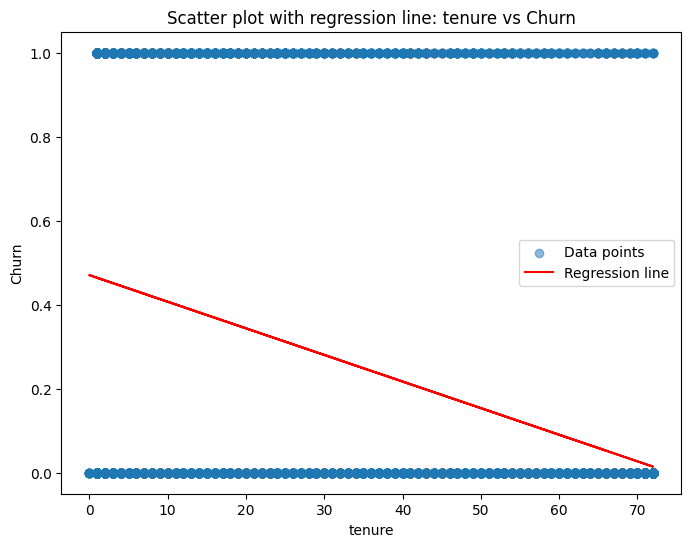

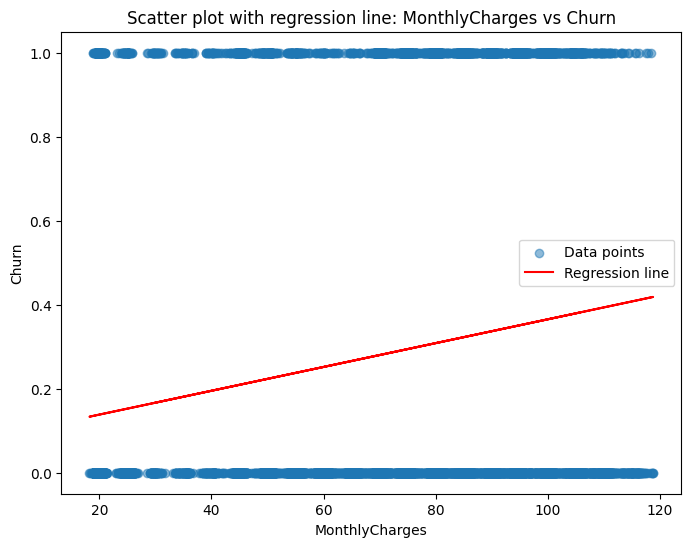

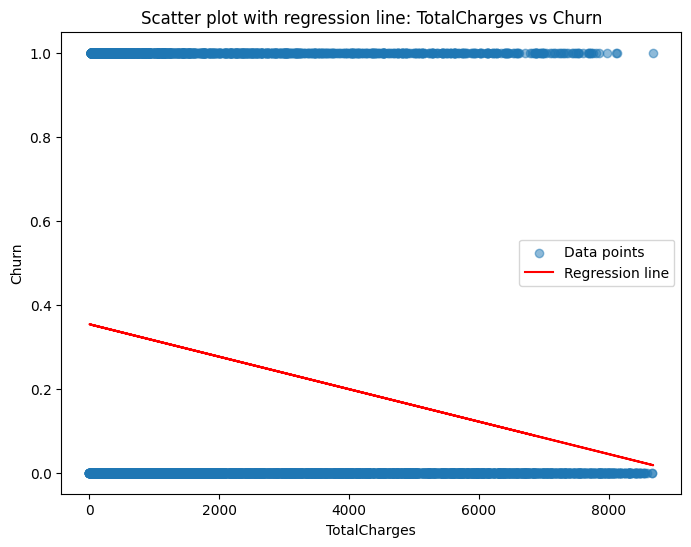

In [61]:
# First, we'll extract only the numeric continuous variables for analysis


numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Continuous numeric features
target = 'Churn'

# Import linear regression for plotting regression lines
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to plot scatter plot with regression line
def plot_scatter_with_regression(x, y, feature_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, alpha=0.5, label='Data points')

    # Fit a linear regression model for the feature and target
    model = LinearRegression().fit(x.values.reshape(-1, 1), y)
    predicted = model.predict(x.values.reshape(-1, 1))

    # Plot regression line
    plt.plot(x, predicted, color='red', label='Regression line')
    plt.title(f'Scatter plot with regression line: {feature_name} vs Churn')
    plt.xlabel(feature_name)
    plt.ylabel('Churn')
    plt.legend()
    plt.show()

# Iterate through each numeric feature to plot scatter plots with regression line
for feature in numeric_features:
    plot_scatter_with_regression(df_linmodel[feature], df_linmodel[target], feature)


For all those assumption plots we can say that since the outcome is binary, the assumption of linearity between the predictor (tenure) and the outcome (churn) is inherently violated. Linear regression is not suitable for modeling binary outcomes because it assumes a continuous relationship, which we don’t have here.

## Since the target variable is binary the assumption doesn't make much sense.

### Since we have a binary outcome and now binary dummy-variables we can assess linear relationaships through the
*Point-Biserial Correlation*

For binary predictors, a point-biserial correlation is essentially a special case of the Pearson correlation used to measure the strength of association between a binary predictor and a continuous outcome.
While churn is binary, this can give an indication of the strength of the linear relationship between the predictor and the outcome.


In [64]:
non_continuous_vars = ['gender', 'SeniorCitizen', 'Partner','Dependents','PhoneService','MultipleLines',
                       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                       'StreamingTV','StreamingMovies','PaperlessBilling','Contract_Month-to-month','Contract_One year',
                       'Contract_Two year','PaymentMethod_Mailed check','PaymentMethod_Credit card (automatic)',
                       'PaymentMethod_Bank transfer (automatic)','PaymentMethod_Electronic check'
                       ]

# Loop through each non-continuous variable and calculate point-biserial correlation with Churn
from scipy.stats import pointbiserialr

# Store the results in a dictionary
correlation_results = {}

for var in non_continuous_vars:
    if var in df_linmodel.columns:
        corr, p_value = pointbiserialr(df_linmodel[var], df_linmodel['Churn'])
        correlation_results[var] = {'correlation': corr, 'p_value': p_value}

# Display the correlation results
correlation_results


{'gender': {'correlation': 0.00861209507899774,
  'p_value': 0.46990453909803853},
 'SeniorCitizen': {'correlation': 0.1508893281764723,
  'p_value': 3.839860055788064e-37},
 'Partner': {'correlation': -0.15044754495917637,
  'p_value': 6.220731129621675e-37},
 'Dependents': {'correlation': -0.1642214015797252,
  'p_value': 9.140432989088978e-44},
 'PhoneService': {'correlation': 0.011941980029003041,
  'p_value': 0.31631478134317115},
 'MultipleLines': {'correlation': 0.04010212769982621,
  'p_value': 0.0007620291315109776},
 'InternetService': {'correlation': 0.22789044975609482,
  'p_value': 1.2005035459897197e-83},
 'OnlineSecurity': {'correlation': -0.17122629194855282,
  'p_value': 1.763258816853648e-47},
 'OnlineBackup': {'correlation': -0.08225486893814284,
  'p_value': 4.727291732055979e-12},
 'DeviceProtection': {'correlation': -0.0661597912802896,
  'p_value': 2.738160249820151e-08},
 'TechSupport': {'correlation': -0.1646735559015943,
  'p_value': 5.322253267502602e-44},
 '

## Linearity assumption for LR conclusion:

* The type of outcome and data itself isn't really suitable for this assumption check and probably the LR model itself. By the analysis we could do we can say there are some correlations which we also saw in the EDA.

**Overall:**

Key Takeaways:

* Contract type and InternetService are some of the strongest predictors of churn, with moderate correlations.

* OnlineSecurity and TechSupport show that having these services reduces churn, but the effect is weak.

* Paperless billing and Electronic check users show a higher likelihood of churn.

* Variables like gender, PhoneService, and MultipleLines have very weak or no significant correlation with churn.

## Multi-collinearity assumption

This we can also assess pre-model fitting.

1. Correlations

We already know that tenure, montnhly charges and total charges are all correlated since they do show pretty much same info. Here it would make sense to leave just monthly charges and tenure to show different info. Let's assess the whole correlation matrix.

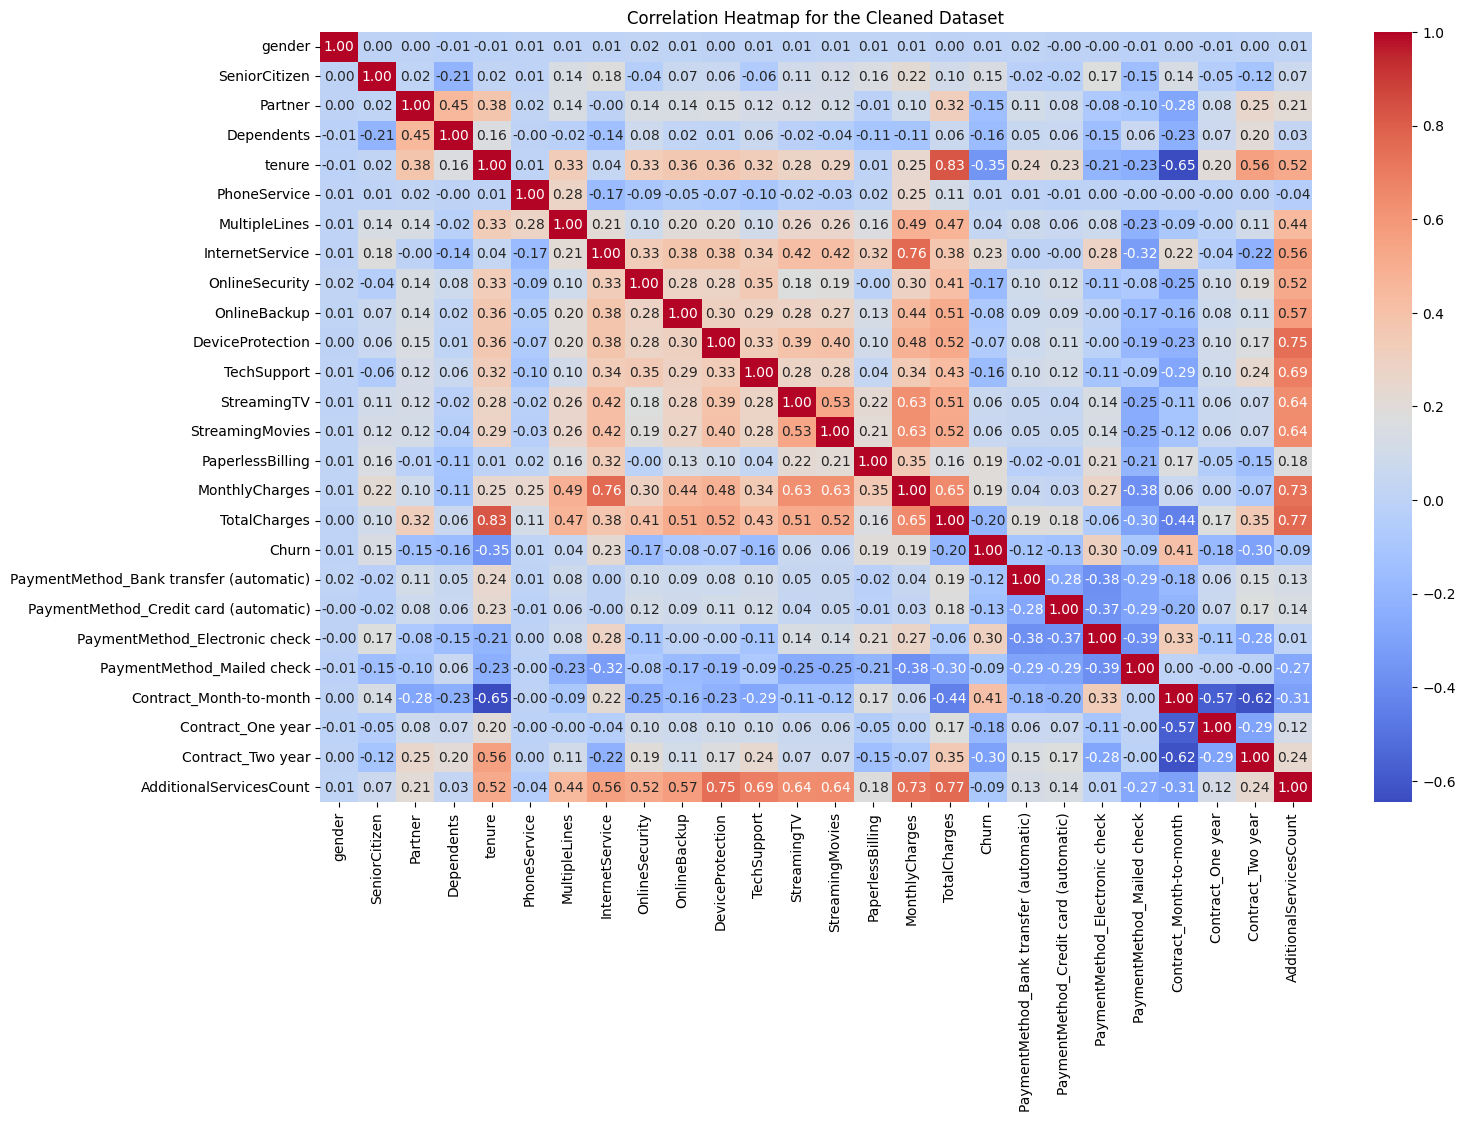

In [77]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_linmodel.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for the Cleaned Dataset')
plt.show()

# No endogeneity assumption

While we can't physically assess it we will make sure to avoid omitted variable bias by including relevant controls such as gender, senior citizenship and so on.

# Fitting the first model and assesing other assumptions

### Linear Regression Model Specification


In [16]:
df_linmodel = df_linmodel.astype({col: int for col in df_linmodel.select_dtypes(include='bool').columns})
df_linmodel['AdditionalServicesCount'] = df_linmodel[['OnlineSecurity', 'OnlineBackup',
                                                      'DeviceProtection', 'TechSupport',
                                                      'StreamingTV', 'StreamingMovies',
                                                      'MultipleLines','DeviceProtection',
                                                      'TechSupport']].sum(axis=1)


In [90]:
X = df_linmodel.drop(columns=['Churn','TotalCharges'])
y = df_linmodel['Churn']

In [80]:
X = sm.add_constant(X)

In [81]:
# Fit the linear regression model
lin_model = sm.OLS(y, X).fit()

# Get the summary of the model to assess the coefficients and p-values
lin_model_summary = lin_model.summary()


In [91]:
lin_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     129.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:08:37   Log-Likelihood:                -3084.1
No. Observations:                7043   AIC:                             6212.
Df Residuals:                    7021   BIC:                             6363.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1683      0.015     11.471      0.000       0.140       0.197
gender                                      0.0044      0.009      0.494      0.621      -0.013       0.022
SeniorCitizen                               0.0448      0.013      3.433      0.001       0.019       0.070
Partner                                    -0.0017      0.011     -0.161      0.872      -0.023       0.019
Dependents                                 -0.0194      0.011     -1.686      0.092      -0.042       0.003
tenure                                     -0.0046      0.000    -15.146      0.000      -0.005      -0.004
PhoneService                               -0.1661      0.023     -7.125      0.000      -0.212      -0.120
MultipleLines                               0.0470      0.010      4.492      0.000       0.026       0.067
InternetService                            -0.0063      0.025     -0.253      0.801      -0.055       0.043
OnlineSecurity                             -0.0605      0.011     -5.338      0.000      -0.083      -0.038
OnlineBackup                               -0.0317      0.011     -2.931      0.003      -0.053      -0.010
DeviceProtection                            0.0213      0.010      2.125      0.034       0.002       0.041
TechSupport                                -0.0272      0.010     -2.597      0.009      -0.048      -0.007
StreamingTV                                 0.0103      0.012      0.825      0.409      -0.014       0.035
StreamingMovies                             0.0126      0.012      1.014      0.311      -0.012       0.037
PaperlessBilling                            0.0456      0.010      4.557      0.000       0.026       0.065
MonthlyCharges                              0.0054      0.001     10.705      0.000       0.004       0.006
PaymentMethod_Bank transfer (automatic)     0.0303      0.009      3.190      0.001       0.012       0.049
PaymentMethod_Credit card (automatic)       0.0230      0.009      2.436      0.015       0.004       0.042
PaymentMethod_Electronic check              0.1016      0.009     11.281      0.000       0.084       0.119
PaymentMethod_Mailed check                  0.0133      0.009      1.480      0.139      -0.004       0.031
Contract_Month-to-month                     0.1128      0.009     12.042      0.000       0.094       0.131
Contract_One year                           0.0062      0.009      0.662      0.508      -0.012       0.025
Contract_Two year                           0.0492      0.011      4.409      0.000       0.027       0.071
AdditionalServicesCount                    -0.0339      0.003    -10.678      0.000      -0.040      -0.028
===========================================================

# Assumption check

## 1. Independence

**For most assumptions, we will need to work with residuals:**

In [85]:
## getting residuals from the model
residuals = lin_model.resid


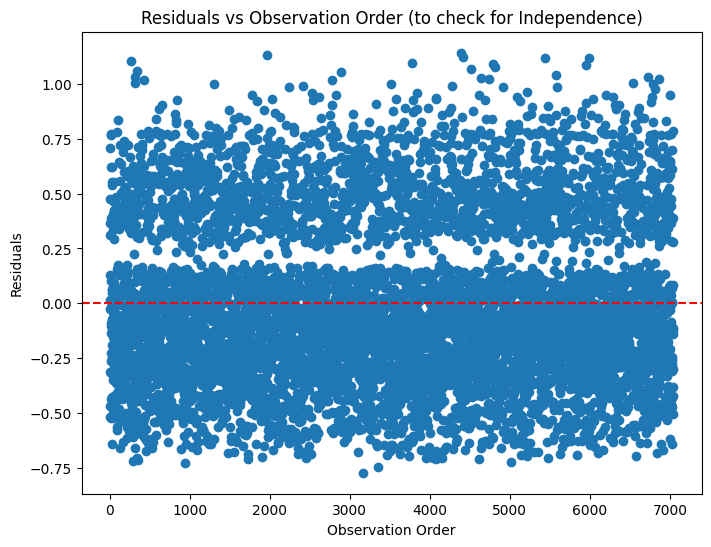

In [84]:
residuals = lin_model.resid

plt.figure(figsize=(8, 6))
plt.plot(residuals, marker='o', linestyle='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Observation Order (to check for Independence)')
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.show()


The plot shows a random scatter of points around the horizontal line at zero. Since the residuals seem to be randomly distributed and do not follow any systematic pattern, this suggests that the independence assumption is satisfied.

In [82]:
from statsmodels.stats.stattools import durbin_watson

# Extract residuals from the fitted model
residuals = lin_model.resid

# Perform Durbin-Watson Test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 2.0102115033713543


Interpretation: A Durbin-Watson statistic close to 2 indicates that the residuals are independent.

## 2. Homoscedasticity



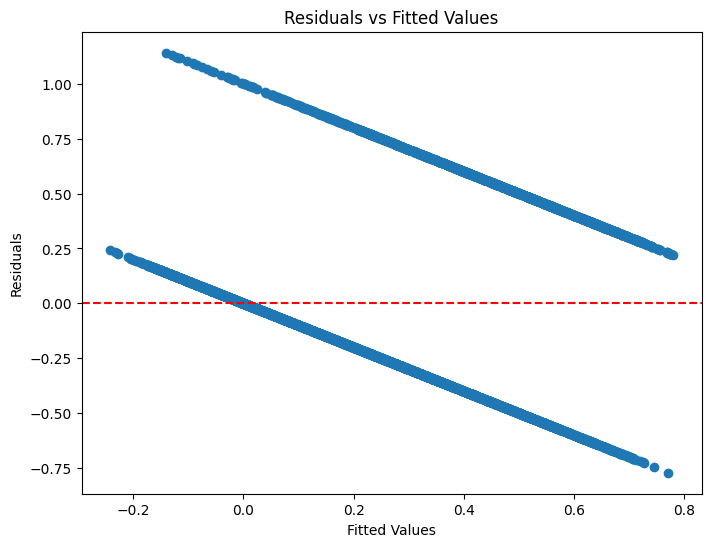

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(lin_model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The clear pattern in the plot indicates that the residuals do not have constant variance, which violates the homoscedasticity assumption.


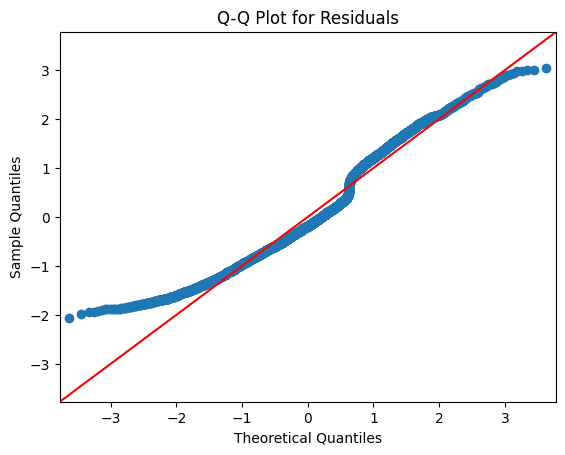

In [88]:
import statsmodels.api as sm

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot for Residuals')
plt.show()


The normality assumption is likely violated, as the residuals do not closely follow the normal distribution in the tails

# Assessing the linear model performance

Initially, since many assumptions are violated we can already say that linear model is not the best for this task. However, let's asses the model performance.

In [93]:
print(lin_model_summary)

                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     129.3
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        05:08:37   Log-Likelihood:                -3084.1
No. Observations:                7043   AIC:                             6212.
Df Residuals:                    7021   BIC:                             6363.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

### Linear Model interpretation

We won't interpret every single one coefficient but broadly speaking:
### Summary of Predictor Impact on Churn:

* SeniorCitizen: Being a senior citizen increases the likelihood of churn by 4.48% and is statistically significant.
* tenure: Each additional month of tenure reduces the probability of churn by 0.46%. Highly significant.
* PhoneService: Having phone service decreases the likelihood of churn by 16.61%. Highly significant.
* MultipleLines: Having multiple lines increases the likelihood of churn by 4.7%. Significant.
* OnlineSecurity: Having online security reduces the likelihood of churn by 6.05%. Highly significant.
* MonthlyCharges: Higher monthly charges are associated with a 0.54% increase in churn likelihood. Significant.
* PaymentMethod (Electronic check): Customers using electronic checks are 10.16% more likely to churn. Highly significant.
* Contract (Month-to-month): Being on a month-to-month contract increases the likelihood of churn by 11.28%. Significant.

* Contract (Two-year): Two-year contracts reduce churn likelihood by 4.92%.
AdditionalServicesCount: Each additional service reduces churn likelihood by 3.39%. Significant.


## Additional - improving the linear regression
#### Lasso and Ridge


In [107]:
df_linmodel.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'AdditionalServicesCount'],
      dtype='object')

In [111]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define control variables to retain
control_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Split dataset into control variables and other predictors
X_control = X[control_vars]
X_non_control = X.drop(columns=control_vars)

# Scale the data (Lasso requires standardization)
scaler = StandardScaler()
X_non_control_scaled = scaler.fit_transform(X_non_control)

# Combine scaled non-control predictors and control variables
X_combined = pd.concat([pd.DataFrame(X_non_control_scaled, columns=X_non_control.columns), X_control.reset_index(drop=True)], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Fit Lasso Regression with Cross-Validation
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Predictions and performance
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

# Calculate key metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output summary-like information
print("Lasso Regression Summary:")
print(f"R-squared (train): {train_r2}")
print(f"R-squared (test): {test_r2}")
print(f"Mean Squared Error (train): {train_mse}")
print(f"Mean Squared Error (test): {test_mse}")
print(f"Chosen alpha (regularization strength): {lasso.alpha_}")

# Get and display coefficients
lasso_coef = pd.Series(lasso.coef_, index=X_combined.columns)
print("Lasso Coefficients (non-zero only):")
print(lasso_coef[lasso_coef != 0])


Lasso Regression Summary:
R-squared (train): 0.2718124797557344
R-squared (test): 0.3041476460037801
Mean Squared Error (train): 0.14201415244608975
Mean Squared Error (test): 0.13544522586477747
Chosen alpha (regularization strength): 0.0012494007372605977
Lasso Coefficients (non-zero only):
tenure                                  -0.107013
PhoneService                            -0.042925
MultipleLines                            0.008134
InternetService                          0.002563
OnlineSecurity                          -0.042084
OnlineBackup                            -0.027403
DeviceProtection                        -0.013073
TechSupport                             -0.036458
StreamingTV                             -0.005774
PaperlessBilling                         0.022189
MonthlyCharges                           0.144980
PaymentMethod_Credit card (automatic)   -0.000501
PaymentMethod_Electronic check           0.036618
PaymentMethod_Mailed check              -0.004134
Contra

**Interpretation**

## Summary of Lasso Coefficients Analysis:

**Reducing Churn (Negative Coefficients):**

* tenure (-0.107): Longer tenure significantly reduces the likelihood of churn.
* PhoneService (-0.043): Having phone service reduces churn.
* OnlineSecurity (-0.042): Online security services decrease churn likelihood.
* TechSupport (-0.036): Tech support reduces churn.
* AdditionalServicesCount (-0.012): More services a customer uses, the less likely they are to churn.

**Increasing Churn (Positive Coefficients):**

* MonthlyCharges (0.145): Higher monthly charges strongly increase churn likelihood.
* PaymentMethod_Electronic check (0.037): Customers paying via electronic check are more likely to churn.
* Contract_Month-to-month (0.041): Month-to-month contracts increase churn risk.

**Minor Impact (Small Coefficients):**

* MultipleLines (0.008) and PaperlessBilling (0.022) slightly increase churn, but with minimal impact.
* InternetService (0.003), StreamingTV (-0.006), and DeviceProtection (-0.013) have very minor effects.

**Key Insights:**
* Tenure and monthly charges are the most influential variables.
* Additional services like tech support and online security help reduce churn, while electronic check payments and month-to-month contracts increase churn.


In [113]:
from sklearn.linear_model import RidgeCV

from sklearn.metrics import mean_squared_error, r2_score

# Fit Ridge Regression with Cross-Validation
ridge = RidgeCV(alphas=(0.1, 1.0, 10.0), cv=5).fit(X_train, y_train)

# Predictions and performance
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

# Calculate key metrics
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
train_mse_ridge = mean_squared_error(y_train, y_pred_train_ridge)
test_mse_ridge = mean_squared_error(y_test, y_pred_test_ridge)

# Output summary-like information
print("Ridge Regression Summary:")
print(f"R-squared (train): {train_r2_ridge}")
print(f"R-squared (test): {test_r2_ridge}")
print(f"Mean Squared Error (train): {train_mse_ridge}")
print(f"Mean Squared Error (test): {test_mse_ridge}")
print(f"Chosen alpha (regularization strength): {ridge.alpha_}")

# Get and display coefficients
ridge_coef = pd.Series(ridge.coef_, index=X_combined.columns)
print("Ridge Coefficients:")
print(ridge_coef)


Ridge Regression Summary:
R-squared (train): 0.27211830813007865
R-squared (test): 0.30440317568661057
Mean Squared Error (train): 0.14195450852722405
Mean Squared Error (test): 0.13539548790613243
Chosen alpha (regularization strength): 10.0
Ridge Coefficients:
tenure                                    -0.109378
PhoneService                              -0.047401
MultipleLines                              0.011249
InternetService                            0.000807
OnlineSecurity                            -0.041065
OnlineBackup                              -0.027281
DeviceProtection                          -0.010678
TechSupport                               -0.032909
StreamingTV                               -0.007397
StreamingMovies                            0.001638
PaperlessBilling                           0.022513
MonthlyCharges                             0.153376
PaymentMethod_Bank transfer (automatic)   -0.007492
PaymentMethod_Credit card (automatic)     -0.009616
PaymentMe

The performance improved a little bit but not significantly. However with both Lasso and Ridge we got better estimated coefficients.


# Logistic Regression

Since our outcome variable is binary this might already be a better fit for the problem.

Let's fit a logistic regression and check models assumptions.

**Assumptions to check**:

* Linearity - we already checked that prior
* No multicollinearity - checked it prior
* Independence of observations - assessed prior
* No influential outliers
* Absence of perfect separation
* Large sample size - we have 7k observations which should be sufficient


## Fitting Logistic Regression

In [157]:
X = df_linmodel.drop(columns=['Churn','TotalCharges'])
y = df_linmodel['Churn']

In [158]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


logit_model = sm.Logit(y, sm.add_constant(X)).fit()




Optimization terminated successfully.
         Current function value: 0.415700
         Iterations 8


# Assumptions Check

## Linearity


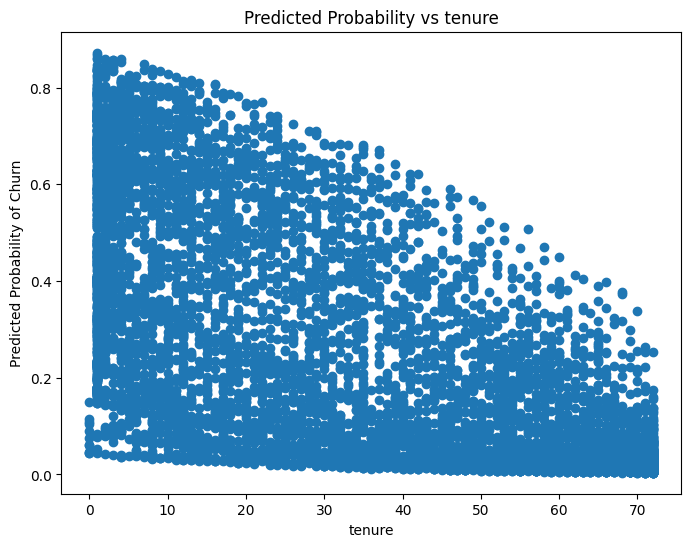

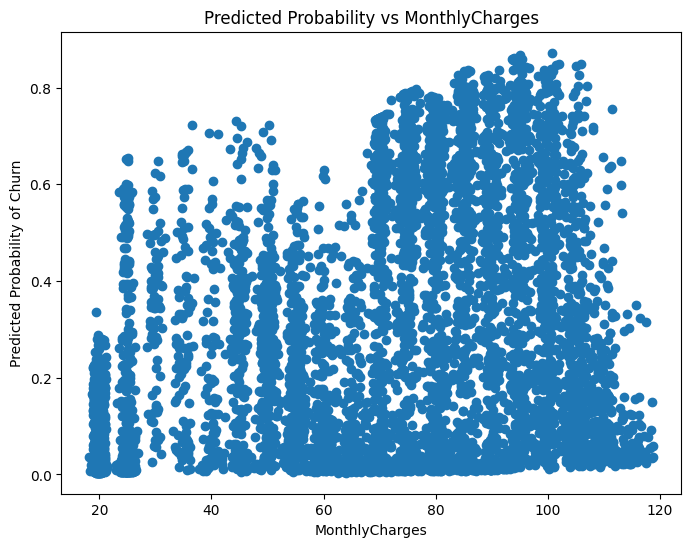

In [139]:
# Predicted probabilities from the logistic regression model
y_pred_probs = logit_model.predict(sm.add_constant(X))

# Plot predicted probabilities vs each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[var], y_pred_probs)
    plt.xlabel(var)
    plt.ylabel('Predicted Probability of Churn')
    plt.title(f'Predicted Probability vs {var}')
    plt.show()


In [127]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'AdditionalServicesCount'],
      dtype='object')

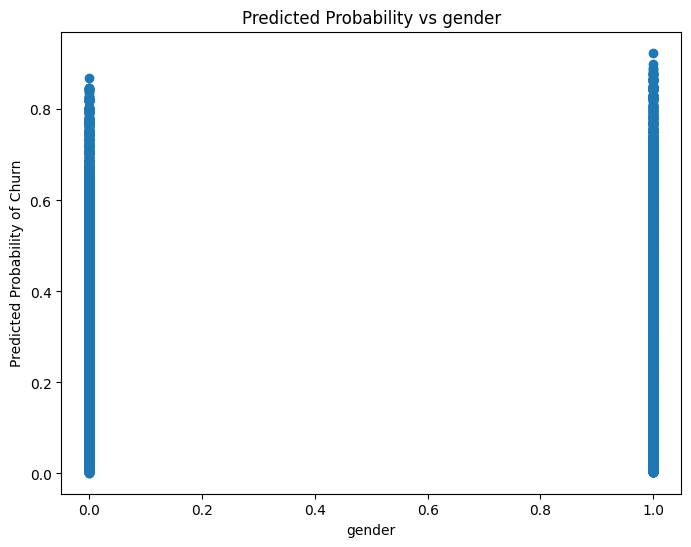

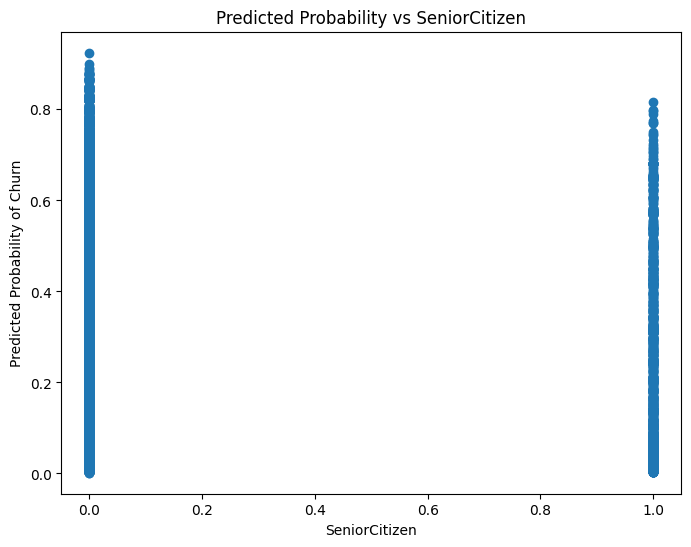

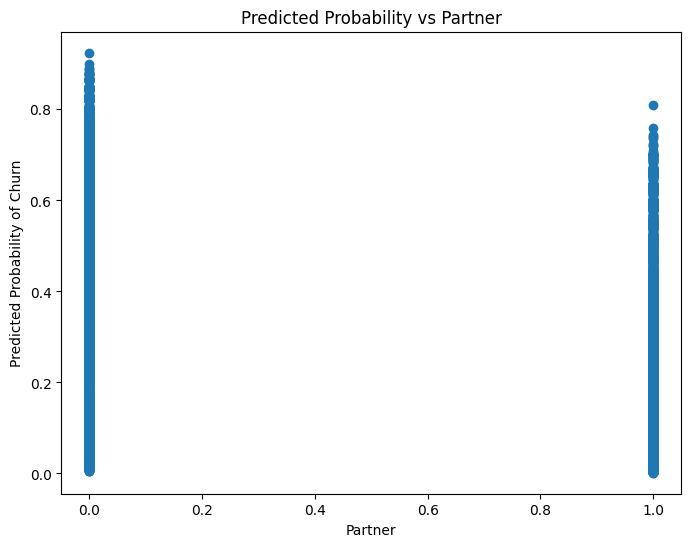

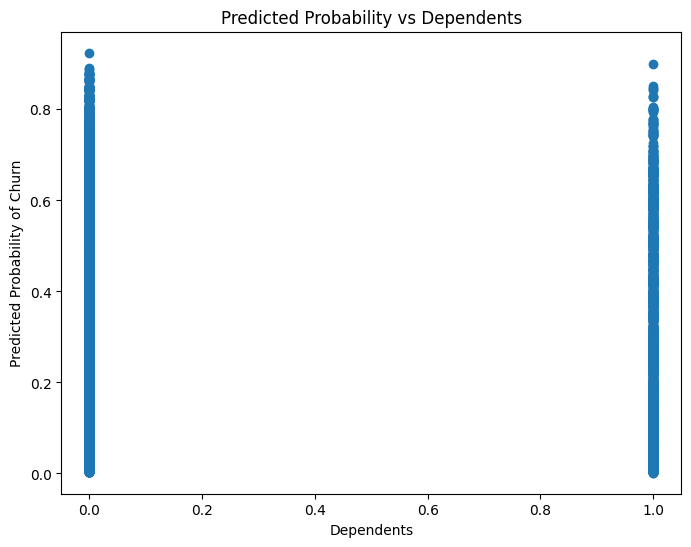

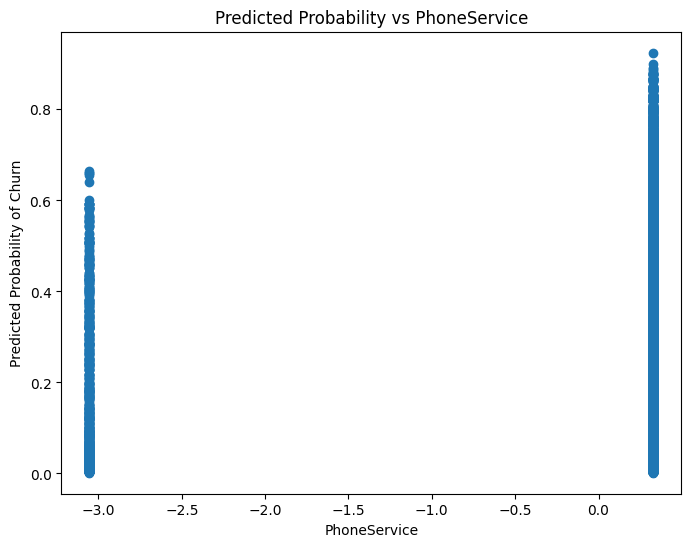

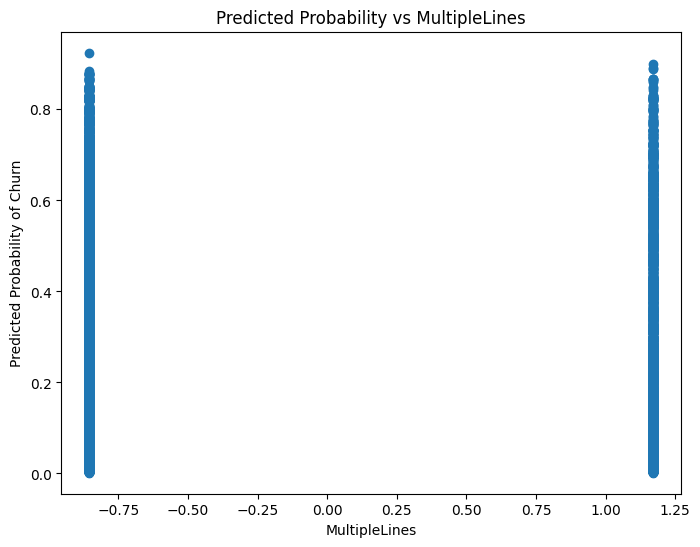

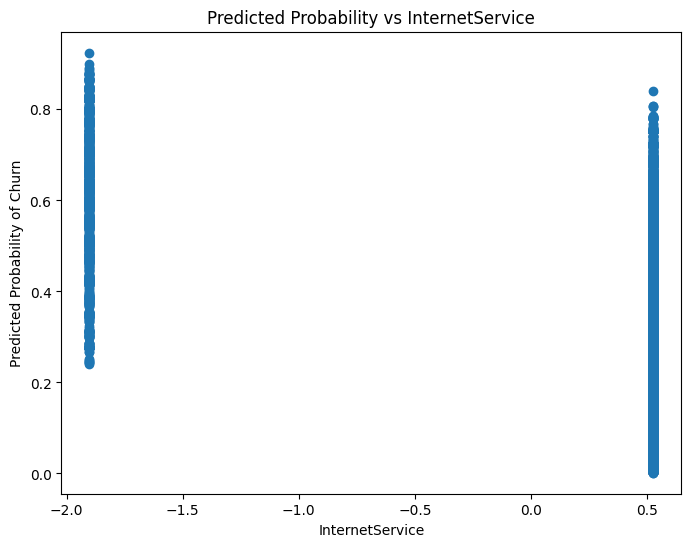

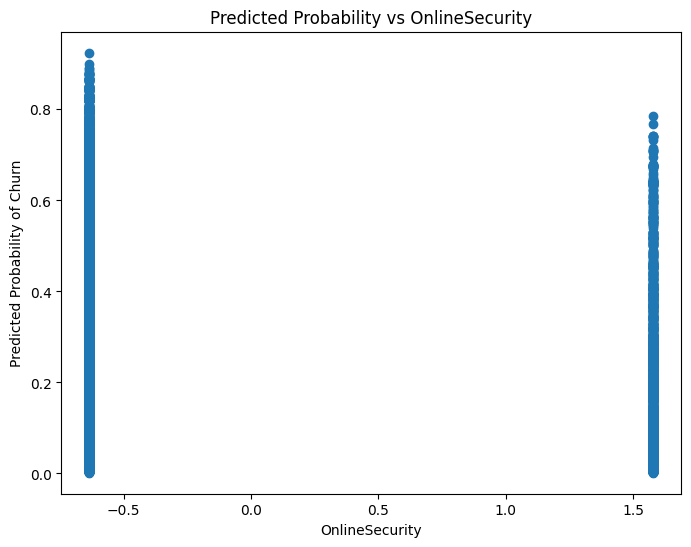

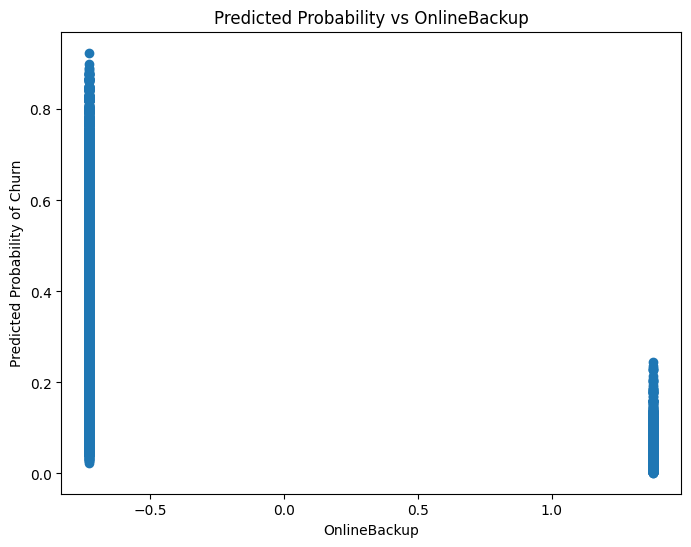

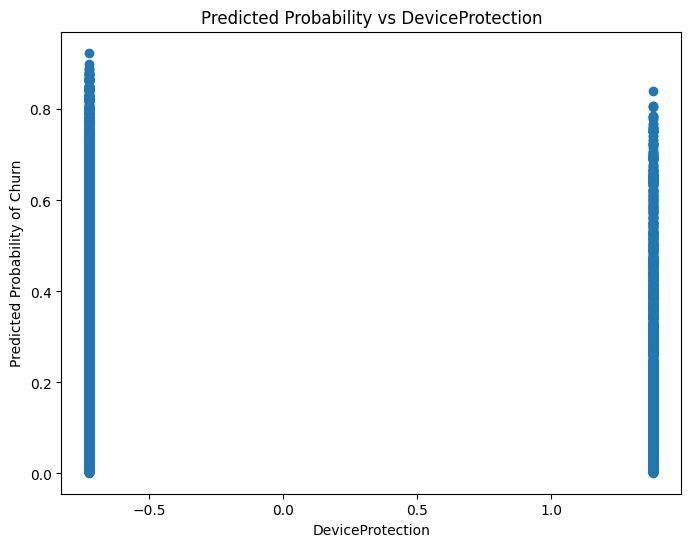

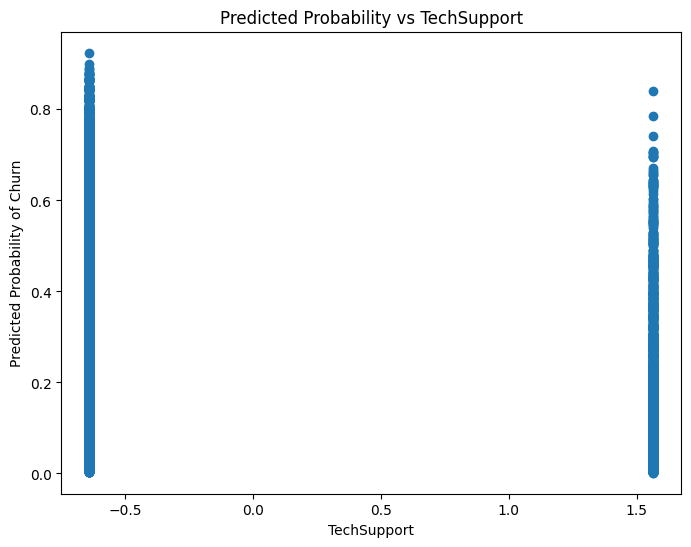

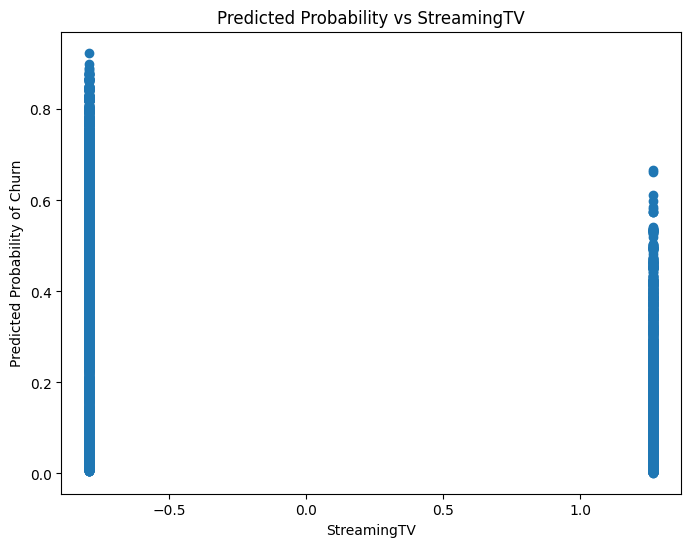

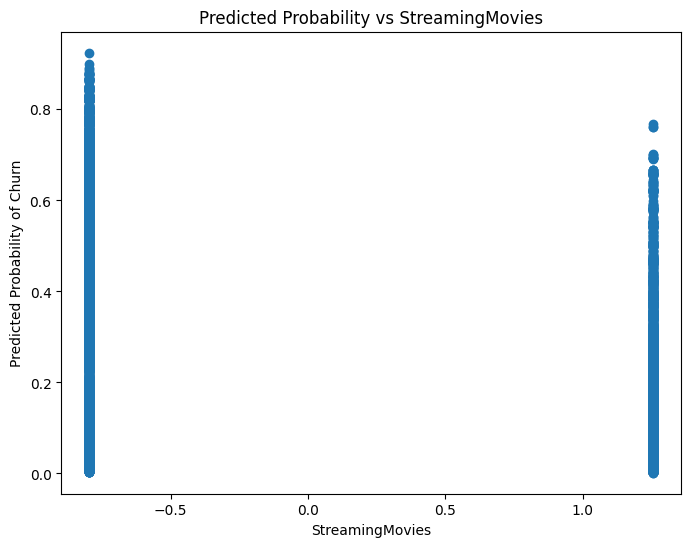

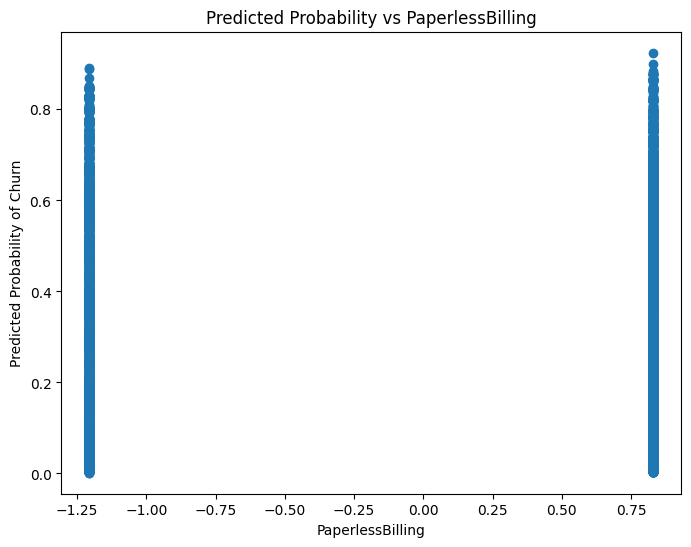

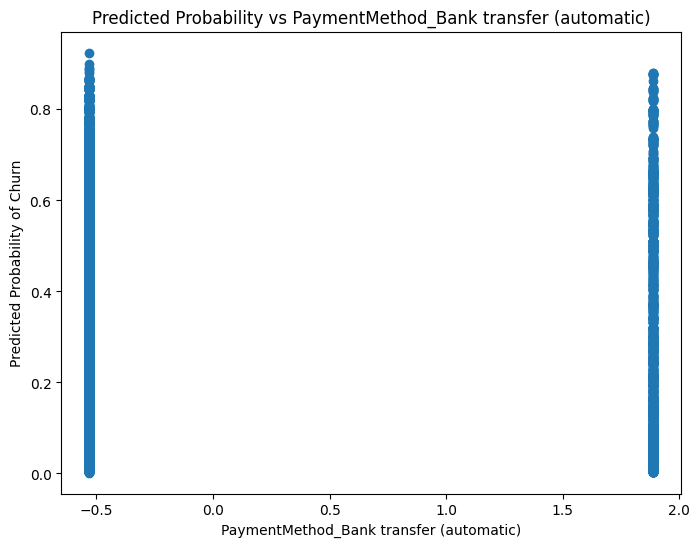

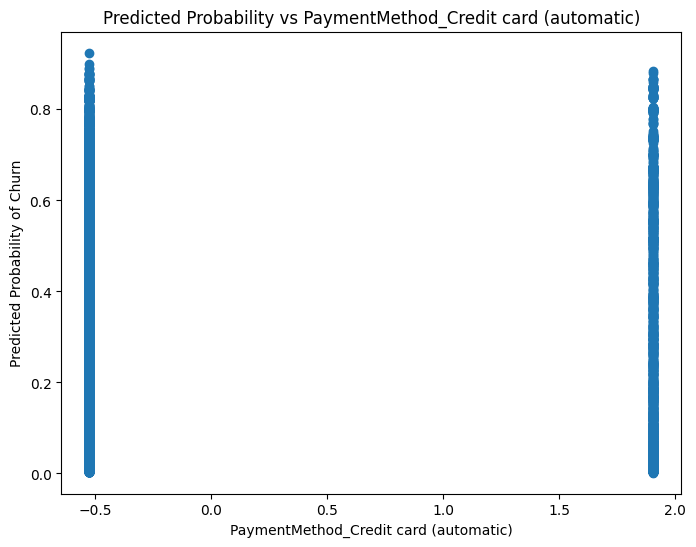

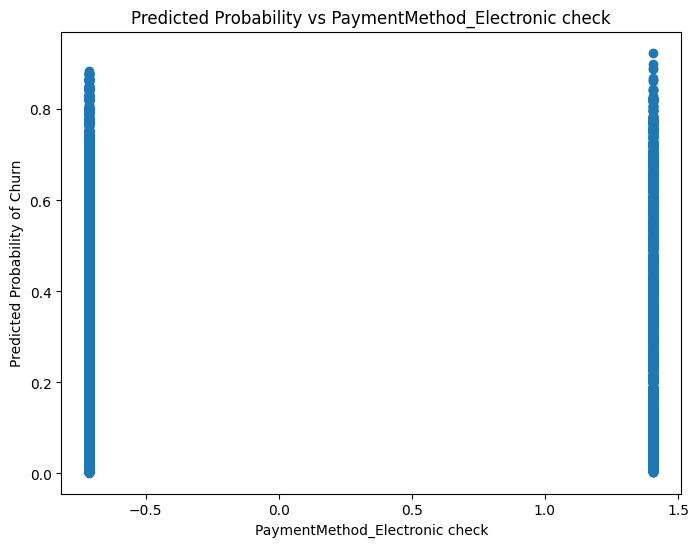

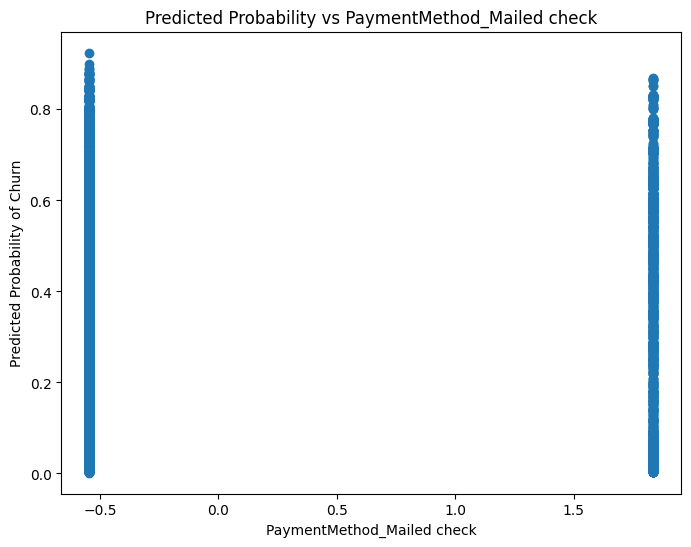

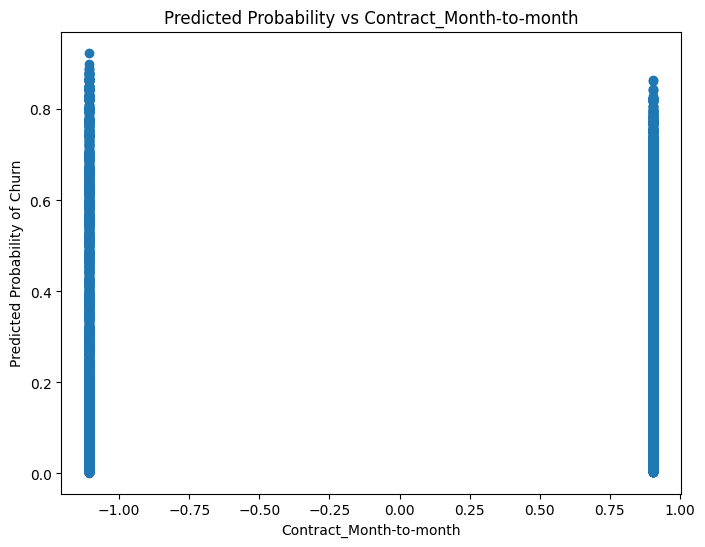

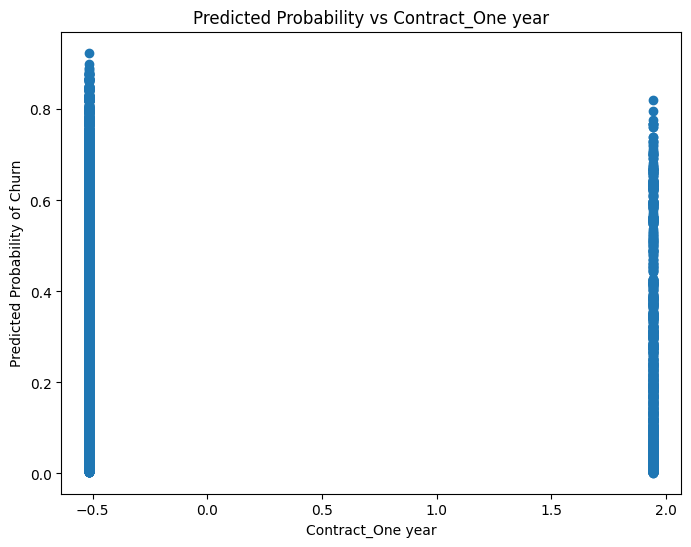

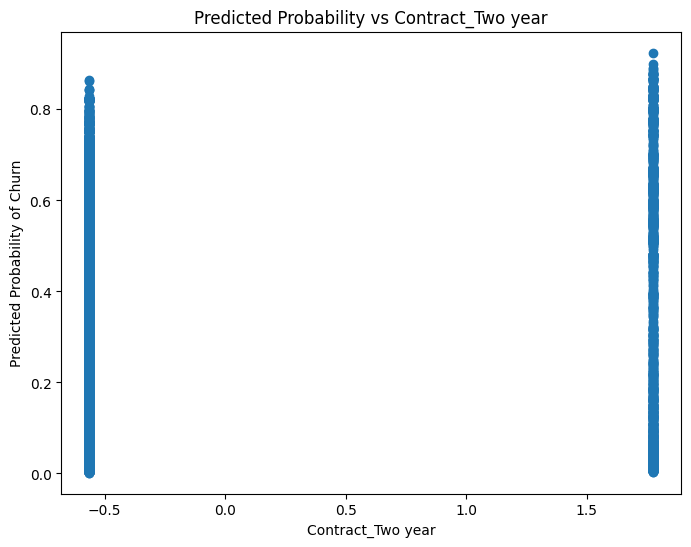

In [128]:
# For binary predictors (example: gender, PhoneService, etc.)
binary_vars = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year'
      ]

for var in binary_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_combined[var], y_pred_probs)
    plt.xlabel(var)
    plt.ylabel('Predicted Probability of Churn')
    plt.title(f'Predicted Probability vs {var}')
    plt.show()


For some variables we see clearly different prediction probabilities which in the case of binary predictors shows that there are patterns within data.

##  No Influential Outliers

We can use Cook's distance to identigy influential outliers

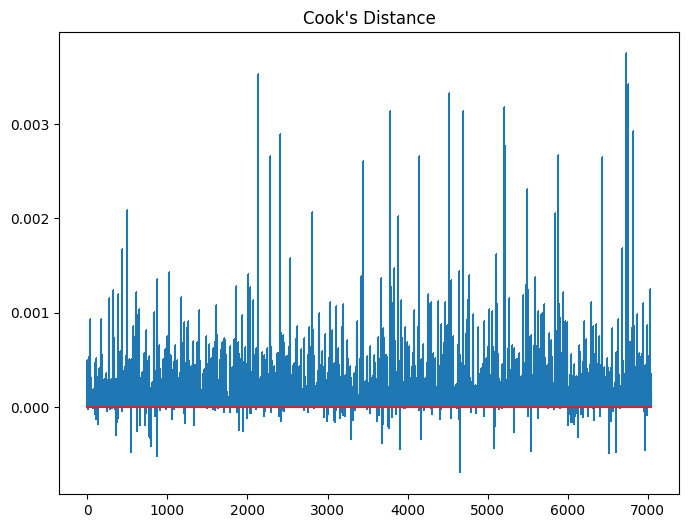

In [142]:
influence = logit_model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.show()


No Outliers of Concern: Based on the plot, there do not appear to be any highly influential points that would skew the results of the logistic regression model. The largest Cook’s distances are well below the usual threshold for concern.

# Logistic Regression Model Interpretation

In [159]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7021
Method:                           MLE   Df Model:                           21
Date:                Tue, 24 Sep 2024   Pseudo R-squ.:                  0.2815
Time:                        06:46:11   Log-Likelihood:                -2927.8
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0505        nan        nan        nan         nan         nan
gender                                      

In [175]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


# Get the coefficients and exponentiate to get odds ratios
odds_ratios = np.exp(logit_model.params)

# Create a DataFrame with odds ratios and calculate percentage change
logit_or_df = pd.DataFrame({
    'Variable': logit_model.params.index,  # Feature names
    'Odds Ratio': odds_ratios
})

# Function to calculate percentage change for odds ratios
def odds_ratio_to_percentage(or_value):
    if or_value > 1:
        return (or_value - 1) * 100  # Percent increase
    else:
        return (1 - or_value) * 100  # Percent decrease

# Apply the function to the odds ratios
logit_or_df['Percent Change'] = logit_or_df['Odds Ratio'].apply(odds_ratio_to_percentage)

# Print the results
logit_or_df


,Variable,Odds Ratio,Percent Change
const,const,0.349765,65.023468
gender,gender,1.023774,2.377415
SeniorCitizen,SeniorCitizen,1.241800,24.180041
Partner,Partner,1.001108,0.110840
Dependents,Dependents,0.844964,15.503566
tenure,tenure,0.966460,3.353981
PhoneService,PhoneService,0.306396,69.360446
MultipleLines,MultipleLines,1.329533,32.953292
InternetService,InternetService,0.933524,6.647632
OnlineSecurity,OnlineSecurity,0.683546,31.645404


### Lasso Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Fit Lasso Logistic Regression with L1 regularization
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
lasso_logistic.fit(X , y)

# Get the coefficients
lasso_coef = lasso_logistic.coef_[0]

# Create a DataFrame for easier interpretation using the original feature names
lasso_coef_df = pd.DataFrame({
    'Variable': X.columns,  # Reference the original column names
    'Coefficient': lasso_coef
})

# Only display non-zero coefficients (significant variables)
significant_vars = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]

print("Lasso Logistic Regression - Significant Coefficients:")
print(significant_vars)



Lasso Logistic Regression - Significant Coefficients:
                                   Variable  Coefficient
0                                    gender     0.015567
1                             SeniorCitizen     0.213515
3                                Dependents    -0.167068
4                                    tenure    -0.034317
5                              PhoneService    -1.170525
6                             MultipleLines     0.212551
7                           InternetService    -0.049219
8                            OnlineSecurity    -0.449677
9                              OnlineBackup    -0.193928
11                              TechSupport    -0.335604
12                              StreamingTV     0.004857
13                          StreamingMovies     0.018332
14                         PaperlessBilling     0.335038
15                           MonthlyCharges     0.034883
16  PaymentMethod_Bank transfer (automatic)    -0.143340
17    PaymentMethod_Credit card (a

In [194]:
# Get the coefficients and exponentiate to convert them to odds ratios
lasso_odds_ratios = np.exp(lasso_logistic.coef_[0])

# Create a DataFrame with feature names, odds ratios, and percentage change
lasso_odds_ratios_df = pd.DataFrame({
    'Variable': X.columns,  # Original feature names
    'Odds Ratio': lasso_odds_ratios
})

# Calculate the percentage change for interpretation
lasso_odds_ratios_df['Percent Change'] = np.where(
    lasso_odds_ratios_df['Odds Ratio'] > 1,
    (lasso_odds_ratios_df['Odds Ratio'] - 1) * 100,  # Positive percentage change for OR > 1
    (1 - lasso_odds_ratios_df['Odds Ratio']) * 100   # Negative percentage change for OR < 1
)

# Only display non-zero odds ratios (features that were retained by Lasso)
significant_vars_or = lasso_odds_ratios_df[lasso_odds_ratios_df['Odds Ratio'] != 1]

# Print the odds ratios and percentage changes for the significant variables
print(significant_vars_or)


                                   Variable  Odds Ratio  Percent Change
0                                    gender    1.015689        1.568897
1                             SeniorCitizen    1.238022       23.802171
3                                Dependents    0.846142       15.385812
4                                    tenure    0.966265        3.373462
5                              PhoneService    0.310204       68.979587
6                             MultipleLines    1.236829       23.682925
7                           InternetService    0.951973        4.802731
8                            OnlineSecurity    0.637834       36.216617
9                              OnlineBackup    0.823717       17.628290
11                              TechSupport    0.714906       28.509358
12                              StreamingTV    1.004869        0.486854
13                          StreamingMovies    1.018501        1.850102
14                         PaperlessBilling    1.397994       39

## Models Interpretation

In this case Lasso tends to overestimate a lot of coefficients.

### Logistic Regression
- **tenure (OR = 0.9665, -3.35%)**: Each additional month of tenure decreases the odds of churn by 3.35%.
- **PhoneService (OR = 0.3064, -69.36%)**: Having phone service reduces the odds of churn by 69.36%.
- **InternetService (OR = 0.9335, -6.65%)**: Internet service reduces the odds of churn by 6.65%.
- **OnlineSecurity (OR = 0.6835, -31.65%)**: Having online security reduces the odds of churn by 31.65%.
- **OnlineBackup (OR = 0.8790, -12.10%)**: Having online backup reduces the odds of churn by 12.10%.
- **DeviceProtection (OR = 1.1540, +15.40%)**: Having device protection increases the odds of churn by 15.40%.
- **TechSupport (OR = 0.8234, -17.66%)**: Having tech support reduces the odds of churn by 17.66%.
- **StreamingTV (OR = 1.0799, +7.99%)**: Streaming TV slightly increases the odds of churn by 7.99%.
- **StreamingMovies (OR = 1.0948, +9.48%)**: Streaming movies increases the odds of churn by 9.48%.
- **PaperlessBilling (OR = 1.4067, +40.67%)**: Customers using paperless billing have 40.67% higher odds of churning.
- **MonthlyCharges (OR = 1.0359, +3.59%)**: Each dollar increase in monthly charges increases the odds of churn by 3.59%.
- **PaymentMethod_Bank transfer (automatic) (OR = 0.7277, -27.23%)**: Bank transfer customers are 27.23% less likely to churn.
- **PaymentMethod_Electronic check (OR = 0.9977, -0.23%)**: Paying by electronic check has no significant impact on churn.
- **Contract_Month-to-month (OR = 1.3863, +38.63%)**: Month-to-month contracts increase churn likelihood by 38.63%.
- **Contract_Two year (OR = 0.3562, -64.38%)**: Two-year contracts reduce the odds of churn by 64.38%.
- **AdditionalServicesCount (OR = 0.8528, -14.72%)**: Each additional service reduces churn odds by 14.72%.
- **gender (OR = 1.0238, +2.38%)**: Gender (likely female) increases the odds of churn by 2.38%.



### Lasso Logistic Regression
### Interpretation of Lasso Logistic Regression Coefficients

- **Gender (Odds Ratio = 1.016, +1.57%)**: Being male (baseline: female) has a small increase in the odds of churn (+1.57%).
- **SeniorCitizen (Odds Ratio = 1.238, +23.80%)**: Senior citizens are **23.8% more likely** to churn compared to non-senior citizens.
- **Dependents (Odds Ratio = 0.846, -15.39%)**: Customers with dependents are **15.4% less likely** to churn.
- **Tenure (Odds Ratio = 0.966, -3.37%)**: Each additional month of tenure **reduces the odds of churn by 3.37%**.
- **PhoneService (Odds Ratio = 0.310, -68.98%)**: Having phone service **significantly reduces churn** by **68.98%**.
- **MultipleLines (Odds Ratio = 1.237, +23.68%)**: Customers with multiple lines are **23.7% more likely** to churn.
- **InternetService (Odds Ratio = 0.952, -4.80%)**: Having internet service reduces churn slightly by **4.80%**.
- **OnlineSecurity (Odds Ratio = 0.638, -36.22%)**: Having online security **reduces churn** by **36.22%**.
- **OnlineBackup (Odds Ratio = 0.824, -17.63%)**: Having online backup **reduces churn** by **17.63%**.
- **TechSupport (Odds Ratio = 0.715, -28.51%)**: Having tech support **reduces churn** by **28.51%**.
- **StreamingTV (Odds Ratio = 1.005, +0.49%)**: Streaming TV has a very minimal effect on churn.
- **StreamingMovies (Odds Ratio = 1.019, +1.85%)**: Streaming movies has a small increase in churn odds (+1.85%).
- **PaperlessBilling (Odds Ratio = 1.398, +39.80%)**: Customers using paperless billing are **39.8% more likely** to churn.
- **MonthlyCharges (Odds Ratio = 1.036, +3.55%)**: Higher monthly charges **slightly increase churn** by **3.55%**.
- **Bank Transfer (Odds Ratio = 0.866, -13.35%)**: Paying via bank transfer **reduces churn** by **13.35%**.
- **Credit Card (Odds Ratio = 0.794, -20.57%)**: Paying via credit card **reduces churn** by **20.57%**.
- **Electronic Check (Odds Ratio = 1.181, +18.09%)**: Paying via electronic check **increases churn** by **18.09%**.
- **Mailed Check (Odds Ratio = 0.854, -14.57%)**: Paying via mailed check **reduces churn** by **14.57%**.
- **One-year Contract (Odds Ratio = 0.517, -48.27%)**: One-year contracts **reduce churn** by **48.27%**.
- **Two-year Contract (Odds Ratio = 0.264, -73.56%)**: Two-year contracts **greatly reduce churn** by **73.56%**.
- **AdditionalServicesCount (Odds Ratio = 0.916, -8.37%)**: Each additional service reduces churn by **8.37%**.

### Key Findings:
- **Two-year contracts**, **PhoneService**, and **TechSupport** are strong churn **reducers**.
- **Senior citizens**, customers on **multiple lines**, and those using **paperless billing** are **more likely to churn**.
- **Electronic check payment** is associated with **higher churn**, while other payment methods reduce it.



As we can see lasso hugely overestimates. The standard logistic regression is closer to the EDA results we saw.

# GAM

In [22]:
X = df_linmodel.drop(columns=['Churn','TotalCharges'])
y = df_linmodel['Churn']

In [23]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'AdditionalServicesCount'],
      dtype='object')

In [24]:
X.shape

(7043, 24)

In [25]:
import pandas as pd
from pygam import LogisticGAM, s, f



# Build the GAM model
# s() is for smoothing terms (continuous variables), f() is for categorical variables

gam = LogisticGAM(
    f(0) +   # gender (index 0)
    f(1) +   # SeniorCitizen (index 1)
    f(2) +   # Partner (index 2)
    f(3) +   # Dependents (index 3)
    s(4) +   # tenure (index 4, continuous, smooth)
    f(5) +   # PhoneService (index 5)
    f(6) +   # MultipleLines (index 6)
    f(7) +   # InternetService (index 7)
    f(8) +   # OnlineSecurity (index 8)
    f(9) +   # OnlineBackup (index 9)
    f(10) +  # DeviceProtection (index 10)
    f(11) +  # TechSupport (index 11)
    f(12) +  # StreamingTV (index 12)
    f(13) +  # StreamingMovies (index 13)
    f(14) +  # PaperlessBilling (index 14)
    s(15) +  # MonthlyCharges (index 15, continuous, smooth)
    f(16) +  # PaymentMethod_Bank transfer (automatic) (index 16)
    f(17) +  # PaymentMethod_Credit card (automatic) (index 17)
    f(18) +  # PaymentMethod_Electronic check (index 18)
    f(19) +  # PaymentMethod_Mailed check (index 19)
    f(20) +  # Contract_Month-to-month (index 20)
    f(21) +  # Contract_One year (index 21)
    f(22) +  # Contract_Two year (index 22)
    s(23)    # AdditionalServicesCount (index 23, continuous, smooth)
)



# Fit the model on the training data
gam.fit(X, y)





# Summary of the GAM model
print(gam.summary())


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      52.549
Link Function:                        LogitLink Log Likelihood:                                 -2844.6885
Number of Samples:                         7043 AIC:                                             5794.4752
                                                AICc:                                            5795.3111
                                                UBRE:                                               2.8287
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3019
Feature Function                  Lam

<ipython-input-25-89cfd6863848>:46: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


# GAM interpretation
**Overall, the GAM conclusions are similar to other analysis**
* SeniorCitizen: Significant (*), older customers more likely to churn.
* Tenure: Highly significant (***), non-linear effect; longer tenure generally reduces churn.
* PhoneService: Highly significant (***), having phone service reduces churn.
* MultipleLines: Highly significant (***), customers with multiple lines are more likely to churn.
* OnlineSecurity: Highly significant (***), lacking online security increases churn.
* PaperlessBilling: Highly significant (***), paperless billing increases churn likelihood.
* MonthlyCharges: Highly significant (***), non-linear effect; higher charges may increase churn.
* Electronic Check Payment: Highly significant (***), customers paying via electronic check are more likely to churn.
* Month-to-month Contract: Highly significant (***), strongly increases churn.
* Two-year Contract: Highly significant (***), significantly reduces churn.
* AdditionalServicesCount: Highly significant (***), more additional services reduce churn.

## Continious variables visualization

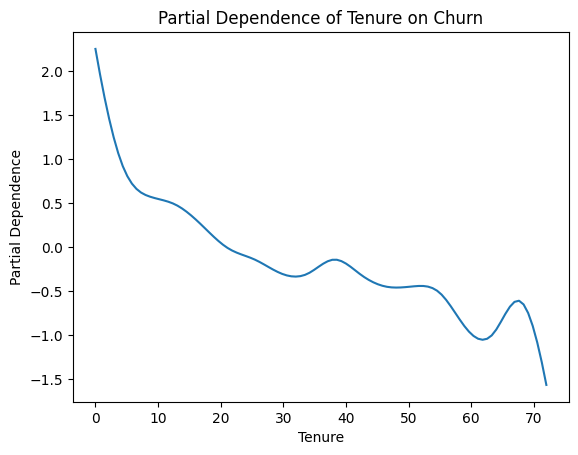

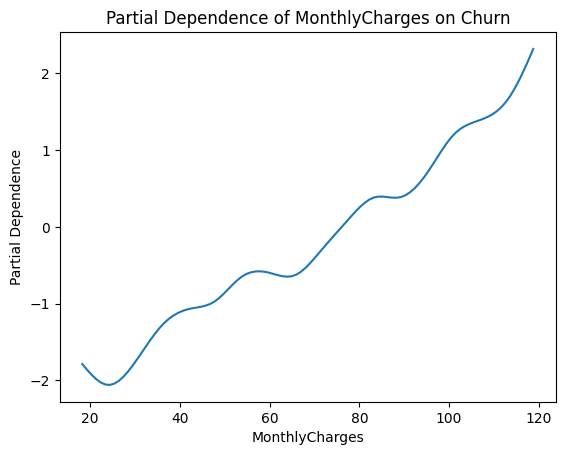

In [196]:
 import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.title('Partial Dependence of Tenure on Churn')

XX = gam.generate_X_grid(term=4)  # Generate a grid of values for 'tenure'
partial_dep = gam.partial_dependence(term=4, X=XX)

# Plot the partial dependence
plt.plot(XX[:, 4], partial_dep)
plt.xlabel('Tenure')
plt.ylabel('Partial Dependence')
plt.show()

# Plot the smooth function for 'MonthlyCharges' (index 15)
plt.figure()
plt.title('Partial Dependence of MonthlyCharges on Churn')

# Calculate partial dependence for 'MonthlyCharges'
XX = gam.generate_X_grid(term=15)
partial_dep = gam.partial_dependence(term=15, X=XX)

# Plot the partial dependence
plt.plot(XX[:, 15], partial_dep)
plt.xlabel('MonthlyCharges')
plt.ylabel('Partial Dependence')
plt.show()


## GAM Interpretation

**Tenure**

*  Early on, especially when Tenure is very low (close to 0 months), the PD is high, indicating that customers are more likely to churn early in their relationship with the company.

* As Tenure increases, the PD decreases, indicating that longer-tenured customers are less likely to churn. This trend stabilizes after about 40 months of tenure, with minor fluctuations after that.

* **Conclusion:** Longer-tenured customers are more likely to stay with the company, while customers in the early months of their subscription are at higher risk of churning.

**Monthly charges**

* For MonthlyCharges between about 20 and 40, the PD values are negative, suggesting that customers with low monthly charges are less likely to churn.

* As MonthlyCharges increase beyond 40, the partial dependence rises sharply, indicating that higher monthly charges correlate with a higher likelihood of churn.

* The PD continues to increase almost linearly after about 70, suggesting that customers paying the highest monthly rates are the most likely to churn.

* **Conclusion:** Customers paying higher monthly charges are more likely to churn, while those paying lower amounts tend to stay with the service.

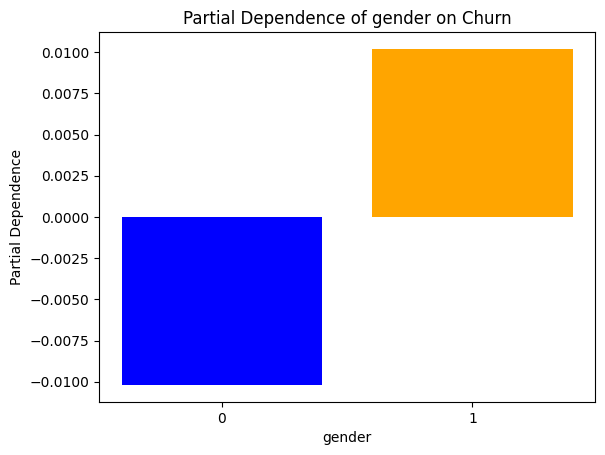

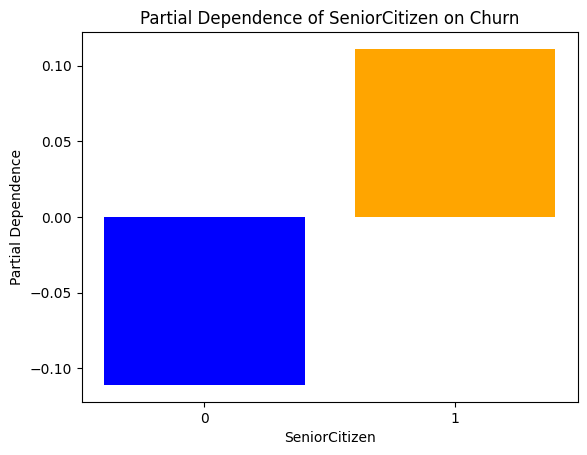

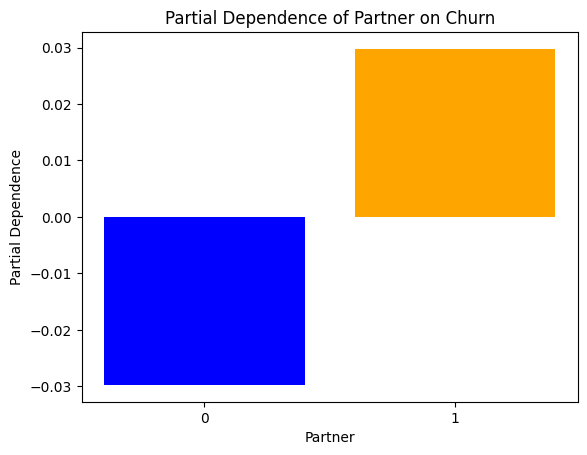

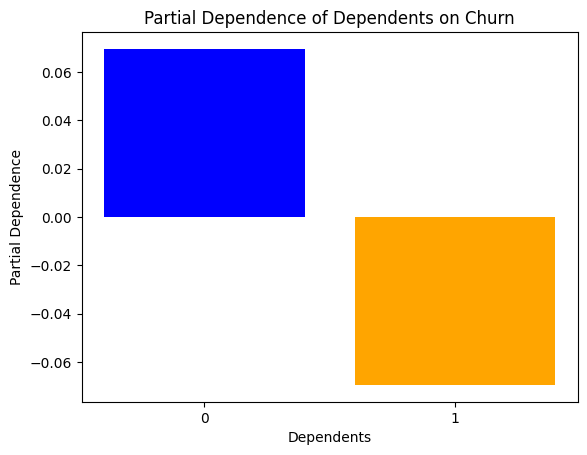

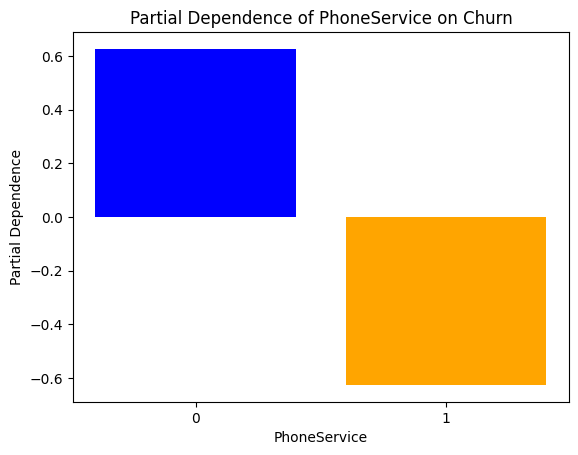

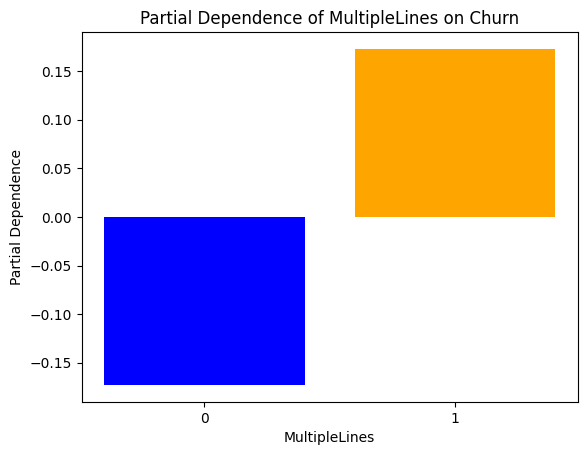

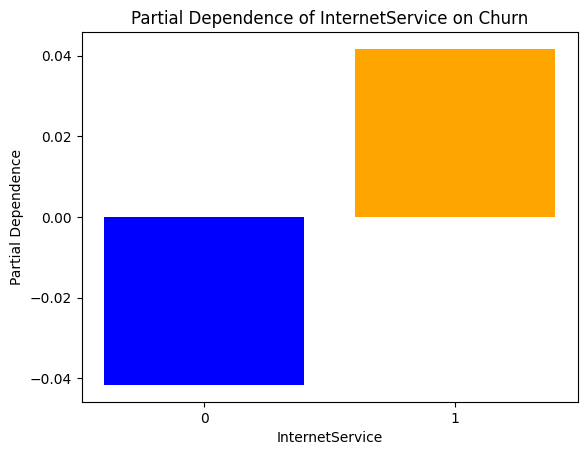

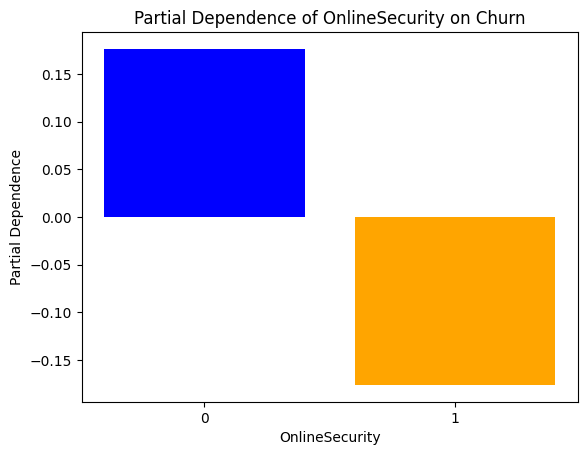

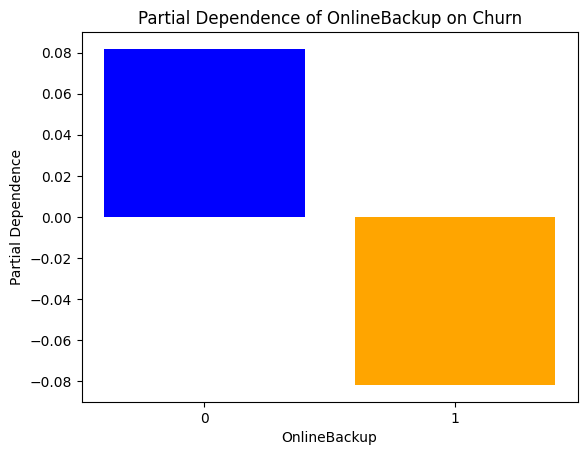

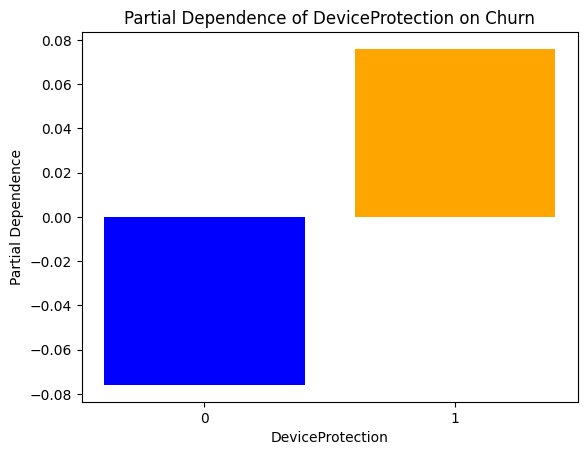

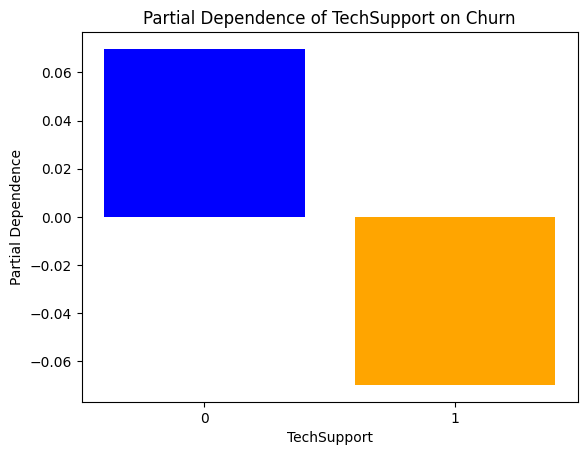

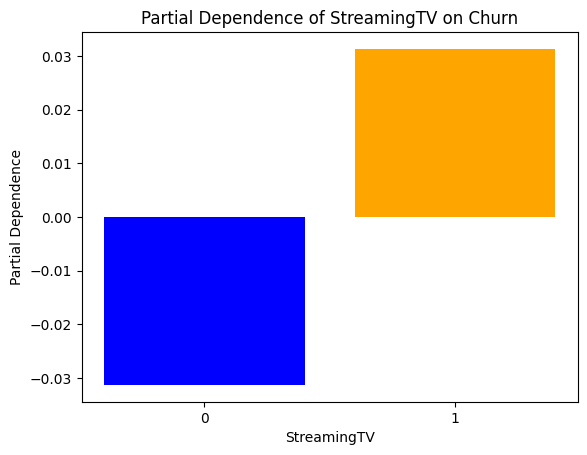

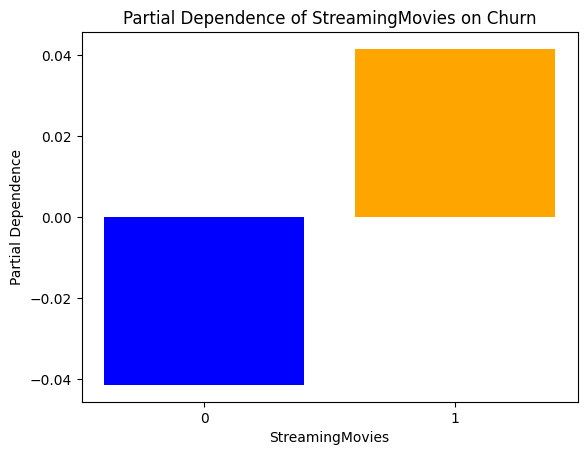

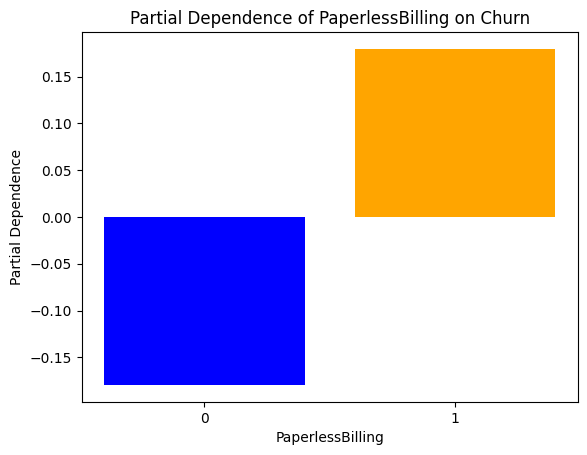

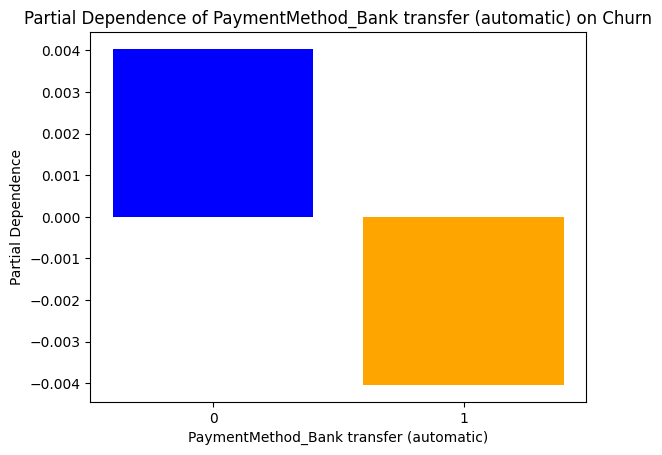

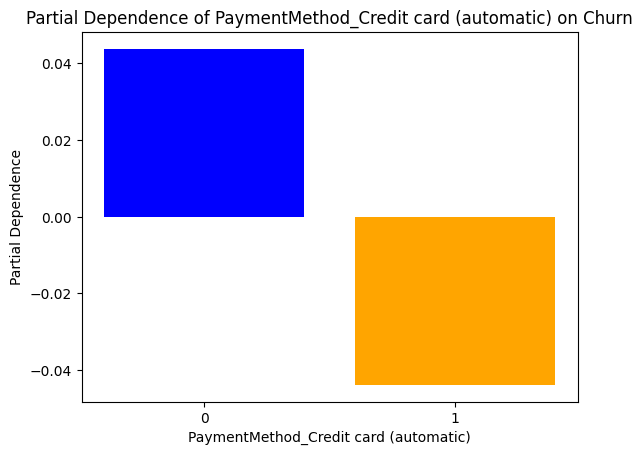

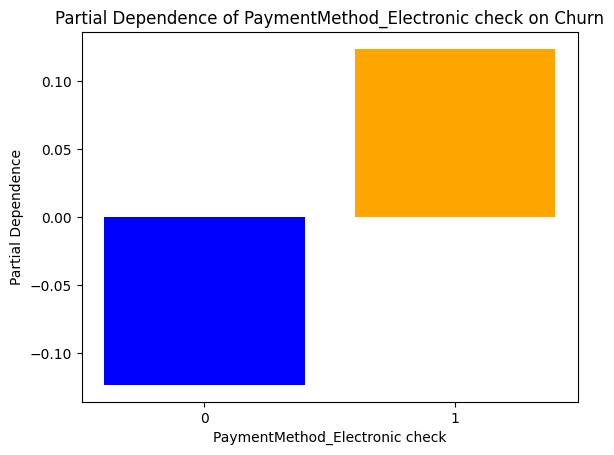

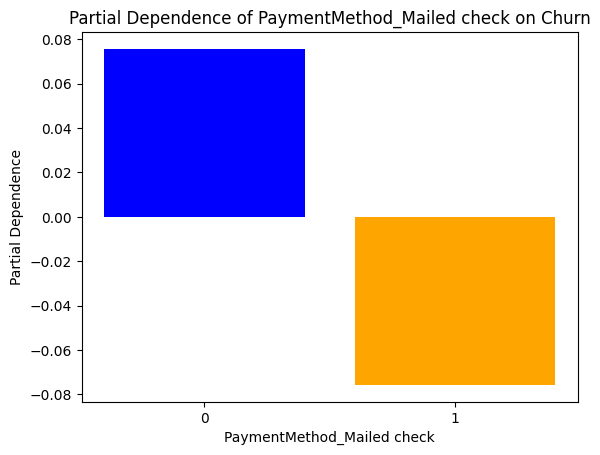

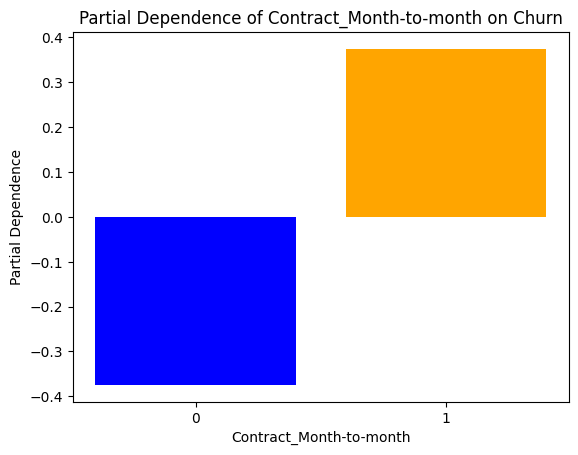

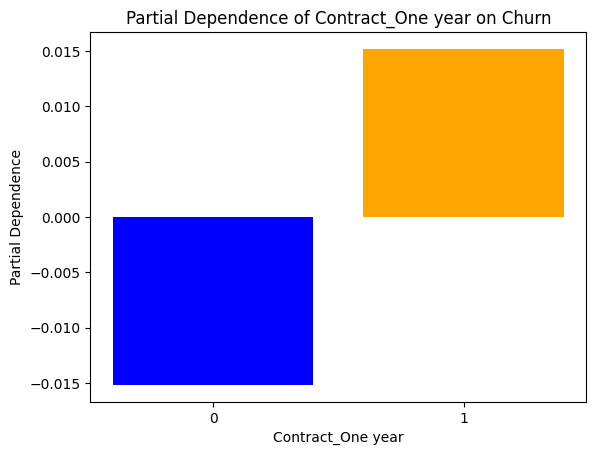

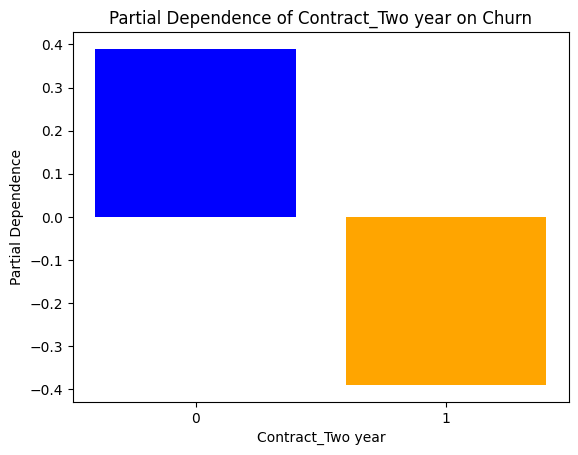

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# List of feature names in your dataset
feature_names = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "tenure",
    "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling",
    "MonthlyCharges", "PaymentMethod_Bank transfer (automatic)", "PaymentMethod_Credit card (automatic)",
    "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "Contract_Month-to-month",
    "Contract_One year", "Contract_Two year", "AdditionalServicesCount"
]

# List of binary predictors' indices (based on your dataframe)
binary_predictors = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22]

# Create a grid of average values for all features
X_averaged = np.zeros((2, X.shape[1]))  # Two rows for the binary values (0, 1) and the number of features
X_averaged[:] = X.mean(axis=0)  # Fill with the mean value of each feature

# Create plots for each binary predictor
for feature_idx in binary_predictors:
    # Create copies of the averaged X, and set the binary feature to 0 and 1
    X_grid = np.tile(X_averaged, (1, 1))  # Copy the average X data
    X_grid[0, feature_idx] = 0  # Set the feature to 0 for the first row
    X_grid[1, feature_idx] = 1  # Set the feature to 1 for the second row

    # Get the partial dependence for the current binary feature
    pd_vals = gam.partial_dependence(feature_idx, X=X_grid)

    # Plot the results
    plt.figure()
    plt.bar(['0', '1'], pd_vals, color=['blue', 'orange'])
    plt.xlabel(f'{feature_names[feature_idx]}')
    plt.ylabel('Partial Dependence')
    plt.title(f'Partial Dependence of {feature_names[feature_idx]} on Churn')
    plt.show()



### Partial difference for binary predictors

We can interpret those bars as partial difference, which indicates how much the factor affect the probability of churn.

For example, being a female has a slightly higher effect on churning compared to being male. However, we can only compare one customer feature at a time and we can't compare which features are most important.




# Final Model Comparison

- **Linear Regression**:
  - **Strengths**: Simple, easy to interpret. Coefficients directly represent the change in churn likelihood per unit increase in each feature.
  - **Weaknesses**: Poor fit for binary classification (churn). Violates assumptions like homoscedasticity and linearity. Not recommended for this dataset. This model assumes the dependent variable is continuous, which leads to incorrect estimates when applied to binary data.

- **Lasso Logistic Regression**:
  - **Strengths**: Performs well with binary classification. Automatically selects significant features through regularization, simplifying the model and reducing overfitting.
  - **Weaknesses**: Some important features might be driven to zero if overly penalized. Regularization might remove useful but less impactful predictors.
  - **Fit for task**: Well-suited for predicting churn with feature selection, offering balance between performance and interpretability.

- **Logistic Regression**:
  - **Strengths**: Clear interpretation with odds ratios, well-suited for binary outcomes. Handles the linear relationship between log-odds and predictors effectively.
  - **Weaknesses**: Limited in handling non-linear relationships and susceptible to outliers.
  - **Fit for task**: A strong baseline model for churn prediction, especially when interpretability is key.

- **Generalized Additive Model (GAM)**:
  - **Strengths**: Captures non-linear relationships effectively. Flexible and more accurate for complex interactions.
  - **Weaknesses**: Computationally intensive, harder to interpret compared to simpler models. Overkill for straightforward tasks.
  - **Fit for task**: Best for understanding non-linear effects in the data, especially for variables like tenure and monthly charges.

### Overall Recommendation
- **Lasso Logistic Regression** is recommended due to its balance between feature selection, performance, and interpretability.
- **GAM** could be used as a secondary model for exploring non-linear relationships, but it may be unnecessary for straightforward churn prediction.





# Recommendation for the company




**Overall Recommendation:**
* For simplicity and interpretability: **Logistic Regression** is a good choice. Fit for the data: Logistic regression is a natural fit for this task since the outcome (churn) is binary.


For performance and feature selection: **Lasso Logistic Regression** is a stronger option, especially if you want to reduce the feature set and focus on the most significant predictors.


For capturing non-linear relationships: **GAM** is the best option, offering flexibility and deeper insights into non-linear trends, but it may be more difficult to explain to stakeholders.


Given the nature of churn prediction, I recommend using **Lasso Logistic Regression** for its balance between performance, feature selection, and interpretability.